# <u>New Year's Resolutions Project - Twitter Resolution Analysis</u>

### Table of Contents

**[Step 0: Project Overview](#Step-0:-Project-Overview)**

> [Dataset Info](#Dataset-Info)

> [Dataset Columns and Explanations](#Dataset-Columns-and-Explanations)

> [Key Features](#Key-Features)

**[Step 1: Business Understanding](#Step-1:-Business-Understanding)**

> [Time-Based Insights](#Time-Based-Insights)

> [Sentiment Analysis (Optional for Early Insights)](#Sentiment-Analysis-(Optional-for-Early-Insights))

**[Step 2: Data Understanding](#Step-2:-Data-Understanding)**

**[Step 3: Data Preparation](#Step-3:-Data-Preparation)**

**[Step 4: Modelling/Analysis](#Step-4:-Modelling/Analysis)**

> [Sentiment Analysis of Resolutions](#Sentiment-Analysis-of-Resolutions)

> [Resolution Popularity by Location](#Resolution-Popularity-by-Location)

> [Impact of Retweets on Resolution Categories](#Impact-of-Retweets-on-Resolution-Categories)

> [Text Analysis and Clustering](#Text-Analysis-and-Clustering)

> [Gender and Region-Based Preferences](#Gender-and-Region-Based-Preferences)

**[Step 5: Evaluation](#Step-5:-Evaluation)**

> [Validate Sentiment Analysis](#Validate-Sentiment-Analysis)

> [Validate Topic Modeling](#Validate-Topic-Modeling)

> [Overall Evaluation Report](#Overall-Evaluation-Report)

**[REFERENCES](#REFERENCES)**

# Step 0: Project Overview

## Project Name: Twitter Resolution Analysis
* This project analyzes tweets to explore sentiment, resolution popularity, and trends based on user activity, geography, and demographics. 
* The insights help uncover user preferences, engagement patterns, and regional variations in resolutions.

## Dataset Info
* I used the dataset which named "new_year_resolutions_dataset.csv" on the Kaggle website.
  
  ( https://www.kaggle.com/datasets/andrewmvd/new-years-resolutions/data )
* This dataset, comprising 5,002 tweets about New Year's resolutions, offers valuable insights to help you boost your chances of achieving your own goals!

## Dataset Columns and Explanations
|Column Name	| Description	| Purpose |
| :----------- | :--------------| :-------|
|tweet_id	   | Unique identifier for each tweet.	| Used to differentiate individual tweets and manage duplicates or subsets.|
|text| The content of the tweet.	| Provides the primary data for text-based analysis, including sentiment analysis and topic modeling.|
|resolution_topics|	The topic or theme associated with the resolution (e.g., health, finance, relationships).| Enables grouping and comparison of tweets based on themes.|
|resolution_category|	The broader category of the resolution (e.g., personal goals, professional growth).| Supports higher-level analysis and visualization of trends.|
|tweet_region|	The geographic region associated with the tweet (e.g., state, country).| Supports geographic analysis to identify regional trends in resolutions.|
|tweet_state|	The specific state associated with the tweet in the USA (if applicable). | Used for detailed geographic visualizations, such as heatmaps.|
|tweet_coord|	Latitude and longitude coordinates of the tweet.| Enables mapping of tweet activity and resolution density on geographic maps.|
|tweet_created|	The timestamp when the tweet was created.| Useful for time-series analysis and identifying hourly, daily, or seasonal trends.|
|retweet_count|	Number of times the tweet was retweeted.| Indicates engagement and virality, used to assess resolution popularity.|
|user_timezone|	The timezone of the user who tweeted.| Helps in aligning data to specific regions and understanding tweet patterns based on timezones.|
|gender| Indicates the gender of the user who tweeted the resolution, providing insights into gender-based trends and preferences.|Helps to analyze gender-based|
|name| Represents the name or username of the individual who posted the tweet |Useful for identifying unique users or conducting further analyses.|
|tweet_date| Captures the date when the tweet was posted | Enabling time-based analysis to identify trends or patterns around New Year’s resolutions.|
|tweet_location| Specifies the location mentioned in the tweet | Helps to analyze geographic trends and regional differences in resolutions.|

## Key Features
* *Sentiment Analysis:* Understand emotional responses to resolutions.
* *Geographic Insights:* Visualize resolution popularity and activity by state and region.
* *Temporal Patterns:* Explore trends in tweet activity by time.
* *Engagement Metrics:* Identify the most retweeted resolutions to gauge user interest and virality.
* *Textual Analysis:* Perform topic modeling and clustering for thematic exploration.

# Step 1: Business Understanding

In [7]:
# !pip uninstall tensorflow tensorflow-intel

In [8]:
# !pip cache purge

In [9]:
# !pip show tensorflow
# !pip show tensorflow-intel

In [10]:
!pip install tensorflow==2.17.0 tensorflow-intel==2.17.0

In [11]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns

!pip install keras
# !pip uninstall keras
# !pip install tf-keras

import warnings

# Ignore all warnings
warnings.filterwarnings('ignore')

In [12]:
# Read data and inspect sample
df = pd.read_csv('C:/Users/Tuba/OneDrive/Masaüstü/Desktop/MINDSET-Python/new_year_resolutions_dataset.csv', sep = ';')
df.sample(5)

resolution_topics  gender            name  \
1985                                    Quit smoking    male     TheGreatKvy   
4530                                  Excersize More  female   lovingmymarla   
958                            Humor about New Years    male  POLAROlDLAUREN   
2383                                     Take a trip  female         Zhanity   
2317  Humor about Recreation and Leisure Resolutions  female         laraabe   

       resolution_category  retweet_count  \
1985      Health & Fitness            0.0   
4530      Health & Fitness            NaN   
958                  Humor            0.0   
2383  Recreation & Leisure            0.0   
2317                 Humor            0.0   

                                                   text tweet_coord  \
1985  ???@chrisbrown: Supper club right now!!!! #New...         NaN   
4530  @Cariloha  to celebrate my birthday on jan 2 a...         NaN   
958        #NewYearsResolution bop Luke Hemmings's nose         NaN   
2383  My New Years resolution is to listen to popula...         NaN   
2317  My New Years resolution is to not have a New Y...         NaN   

            tweet_created  tweet_date     tweet_id  tweet_location  \
1985  2014-12-31T23:25:00  2014-12-31  5,50553E+17  Bellflower, Ca   
4530  2014-12-29T16:45:00  2014-12-29  5,49728E+17         Georgia   
958   2014-12-31T12:35:00  2014-12-31   5,5039E+17        ?? LA ??   
2383  2015-01-01T12:10:00  2015-01-01  5,50746E+17       Fairfield   
2317  2015-01-01T12:15:00  2015-01-01  5,50747E+17         atlanta   

     tweet_state               user_timezone tweet_region  
1985          CA  Pacific Time (US & Canada)         West  
4530          GA  Eastern Time (US & Canada)        South  
958           CA  Pacific Time (US & Canada)         West  
2383          CT  Central Time (US & Canada)    Northeast  
2317          GA  Eastern Time (US & Canada)        South

In [13]:
print(df.head())

print(df.info())

print(df.isnull().sum())

print(df.describe())

                                   resolution_topics  gender             name  \
0                                      Eat healthier  female      Dena_Marina   
1  Humor about Personal Growth and Interests Reso...  female     ninjagirl325   
2                                  Be More Confident    male     RickyDelReyy   
3                                              Other    male        CalmareNJ   
4                                   Be more positive  female  welovatoyoudemi   

  resolution_category  retweet_count  \
0    Health & Fitness            0.0   
1               Humor            1.0   
2     Personal Growth            0.0   
3       Philanthropic            0.0   
4     Personal Growth            0.0   

                                                text tweet_coord  \
0  #NewYearsResolution :: Read more books, No scr...         NaN   
1  #NewYearsResolution Finally master @ZJ10 's pa...         NaN   
2  #NewYearsResolution to stop being so damn perf...         NaN   


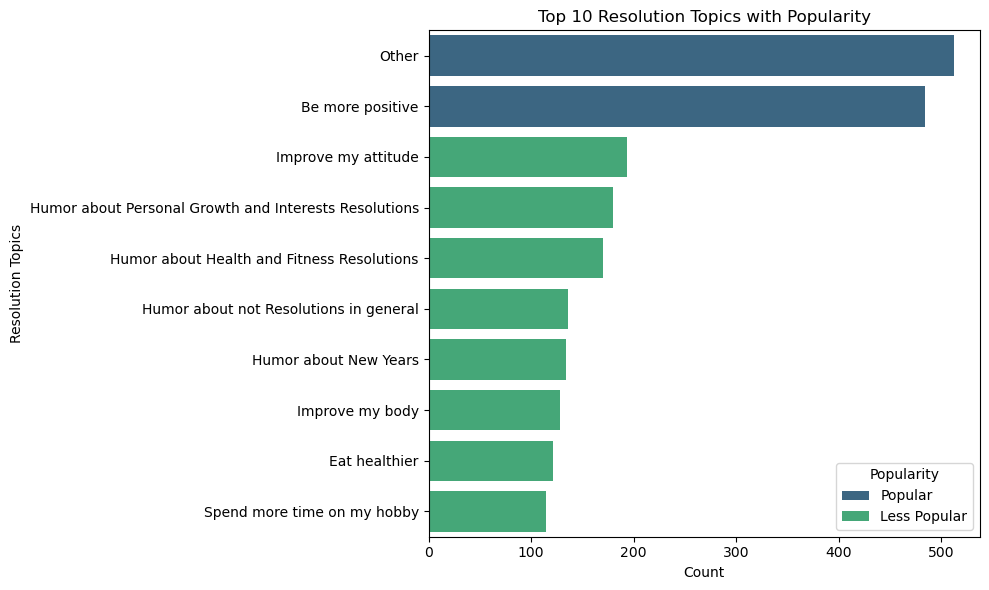

In [14]:
# Convert top topics to DataFrame
top_topics = df['resolution_topics'].value_counts().head(10)
top_topics_df = top_topics.reset_index()
top_topics_df.columns = ['resolution_topics', 'count']

# Add a hue column (e.g., distinguishing popular and less popular topics)
top_topics_df['popularity'] = ['Popular' if x > top_topics.mean() else 'Less Popular' for x in top_topics_df['count']]

# Plot with hue
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_topics_df,
    x='count',
    y='resolution_topics',
    hue='popularity',
    palette="viridis"
)
plt.title("Top 10 Resolution Topics with Popularity")
plt.xlabel("Count")
plt.ylabel("Resolution Topics")
plt.legend(title="Popularity")
plt.tight_layout()
plt.show()

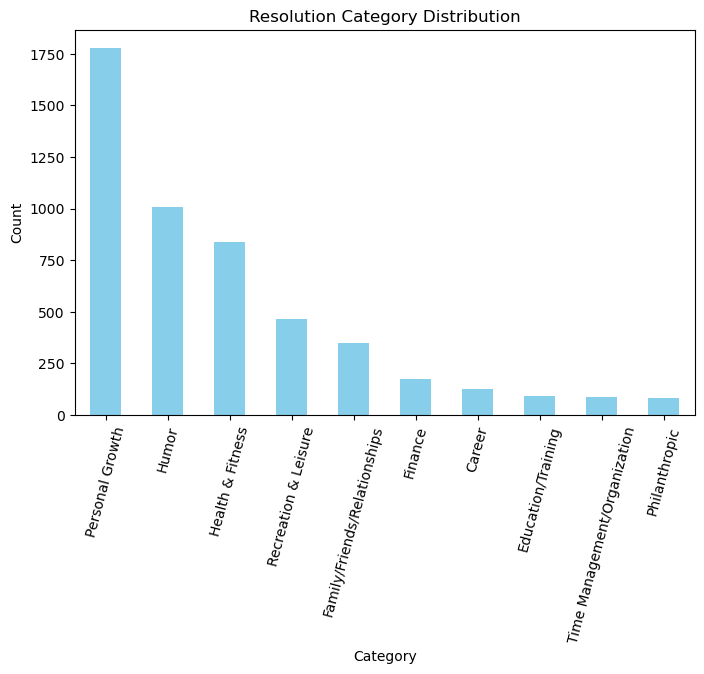

In [15]:
# Resolution categories distribution
plt.figure(figsize=(8, 5))
df['resolution_category'].value_counts().plot(kind='bar', color='skyblue')
plt.title("Resolution Category Distribution")
plt.xlabel("Category")
plt.ylabel("Count")
plt.xticks(rotation=75)
plt.show()

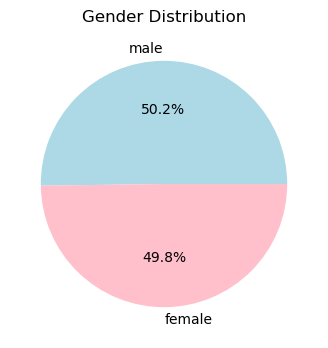

In [16]:
# Gender distribution
gender_counts = df['gender'].value_counts()
plt.figure(figsize=(6, 4))
gender_counts.plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'pink', 'gray'])
plt.title("Gender Distribution")
plt.ylabel("")
plt.show()

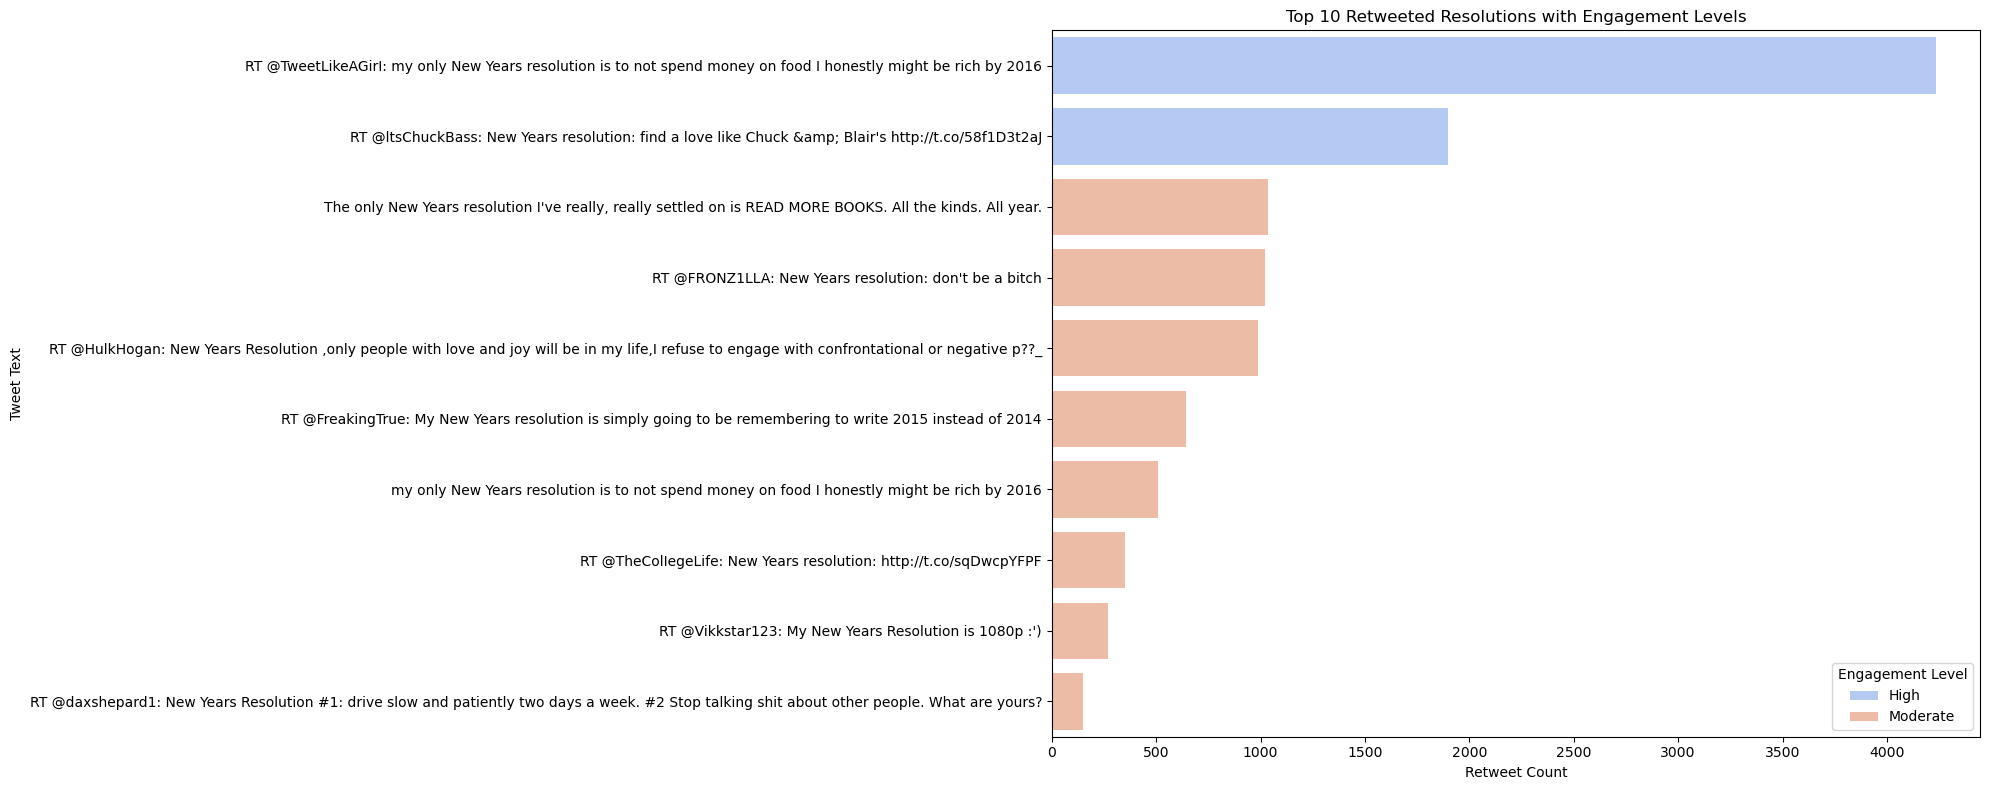

In [17]:
# Add a 'hue' variable to classify retweet counts
top_retweeted = df.sort_values(by='retweet_count', ascending=False).head(10)
top_retweeted['engagement_level'] = ['High' if x > top_retweeted['retweet_count'].mean() else 'Moderate' 
                                     for x in top_retweeted['retweet_count']]

# Plot with hue
plt.figure(figsize=(20, 8))
sns.barplot(
    x=top_retweeted['retweet_count'], 
    y=top_retweeted['text'], 
    hue=top_retweeted['engagement_level'], 
    palette="coolwarm"
)
plt.title("Top 10 Retweeted Resolutions with Engagement Levels")
plt.xlabel("Retweet Count")
plt.ylabel("Tweet Text")
plt.legend(title="Engagement Level")
plt.tight_layout()
plt.show()

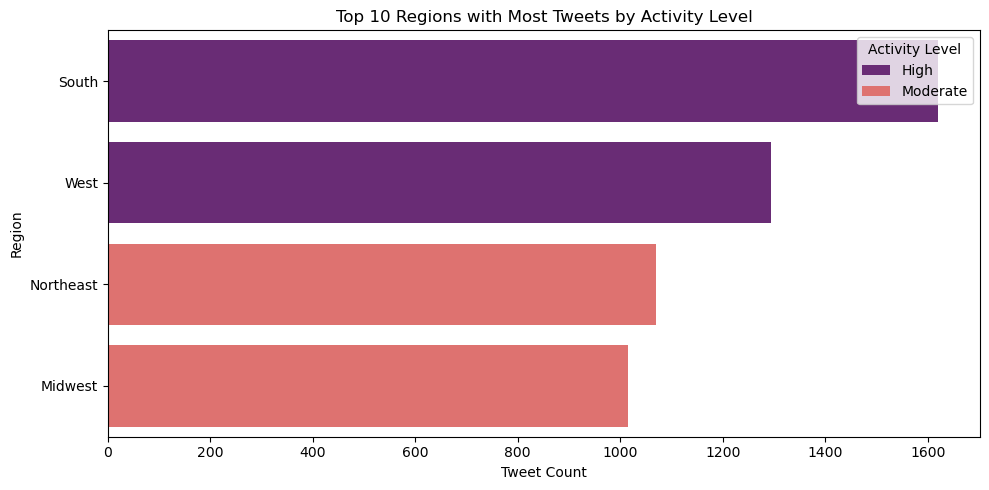

In [18]:
# Add a hue variable to classify regions by activity level
region_counts = df['tweet_region'].value_counts().head(10).reset_index()
region_counts.columns = ['tweet_region', 'count']
region_counts['activity_level'] = ['High' if x > region_counts['count'].mean() else 'Moderate' for x in region_counts['count']]

# Plot with hue
plt.figure(figsize=(10, 5))
sns.barplot(
    x='count', 
    y='tweet_region', 
    hue='activity_level', 
    data=region_counts, 
    palette="magma"
)
plt.title("Top 10 Regions with Most Tweets by Activity Level")
plt.xlabel("Tweet Count")
plt.ylabel("Region")
plt.legend(title="Activity Level", loc="upper right")
plt.tight_layout()
plt.show()

## Time-Based Insights

In [20]:
# Convert tweet_date to datetime format
df['tweet_date'] = pd.to_datetime(df['tweet_date'])
df

resolution_topics  gender  \
0                                         Eat healthier  female   
1     Humor about Personal Growth and Interests Reso...  female   
2                                     Be More Confident    male   
3                                                 Other    male   
4                                      Be more positive  female   
...                                                 ...     ...   
4997                                       Go to Europe  female   
4998  Humor about Family/Friends/Relationships Resol...  female   
4999  Humor about Personal Growth and Interests Reso...  female   
5000                                     Join a startup  female   
5001                                    Improve my body  female   

                 name   resolution_category  retweet_count  \
0         Dena_Marina      Health & Fitness            0.0   
1        ninjagirl325                 Humor            1.0   
2        RickyDelReyy       Personal Growth            0.0   
3           CalmareNJ         Philanthropic            0.0   
4     welovatoyoudemi       Personal Growth            0.0   
...               ...                   ...            ...   
4997      MarthaH1224  Recreation & Leisure            NaN   
4998      rositajones                 Humor            NaN   
4999   mylifeisdelish                 Humor            NaN   
5000      itsmeJajael                Career            NaN   
5001     _LeahHarrell      Health & Fitness            NaN   

                                                   text tweet_coord  \
0     #NewYearsResolution :: Read more books, No scr...         NaN   
1     #NewYearsResolution Finally master @ZJ10 's pa...         NaN   
2     #NewYearsResolution to stop being so damn perf...         NaN   
3     My #NewYearsResolution is to help my disabled ...         NaN   
4     #NewYearsResolution #2015Goals #2015bucketlist...         NaN   
...                                                 ...         ...   
4997  Tomorrow I start @JustifiedFX because @natalie...         NaN   
4998  holy crap, people. EYES OPEN WHEN DRIVING. #Ne...         NaN   
4999  RT @moJO_SHabby: Start parody of her blog #NYR...         NaN   
5000  RT @kscmaghirang: To have an excellent job bef...         NaN   
5001  RT @tompycan: #NewYearsResolution on Jan1: "I'...         NaN   

            tweet_created tweet_date     tweet_id             tweet_location  \
0     2014-12-31T10:48:00 2014-12-31  5,50363E+17        Southern California   
1     2014-12-31T10:47:00 2014-12-31  5,50363E+17                 New Jersey   
2     2014-12-31T10:46:00 2014-12-31  5,50362E+17                  Hollywood   
3     2014-12-31T10:45:00 2014-12-31  5,50362E+17                  Metro NYC   
4     2014-12-31T10:44:00 2014-12-31  5,50362E+17  Pittsburgh, Pennsylvania    
...                   ...        ...          ...                        ...   
4997  2014-12-31T09:43:00 2014-12-31  5,50346E+17                      NC/TN   
4998  2014-12-31T09:45:00 2014-12-31  5,50347E+17            charleston, nyc   
4999  2014-12-31T09:45:00 2014-12-31  5,50347E+17                    Memphis   
5000  2014-12-31T09:48:00 2014-12-31  5,50348E+17                 Paris  USA   
5001  2014-12-31T09:51:00 2014-12-31  5,50348E+17    shenandoah conservatory   

     tweet_state               user_timezone tweet_region  
0             CA  Pacific Time (US & Canada)         West  
1             NJ  Central Time (US & Canada)    Northeast  
2             CA  Eastern Time (US & Canada)         West  
3             NY                         NaN    Northeast  
4             PA  Eastern Time (US & Canada)    Northeast  
...          ...                         ...          ...  
4997          TN                       Quito        South  
4998          NY  Eastern Time (US & Canada)    Northeast  
4999          TN  Central Time (US & Canada)        South  
5000          TX                     Beijing        South  
5001          

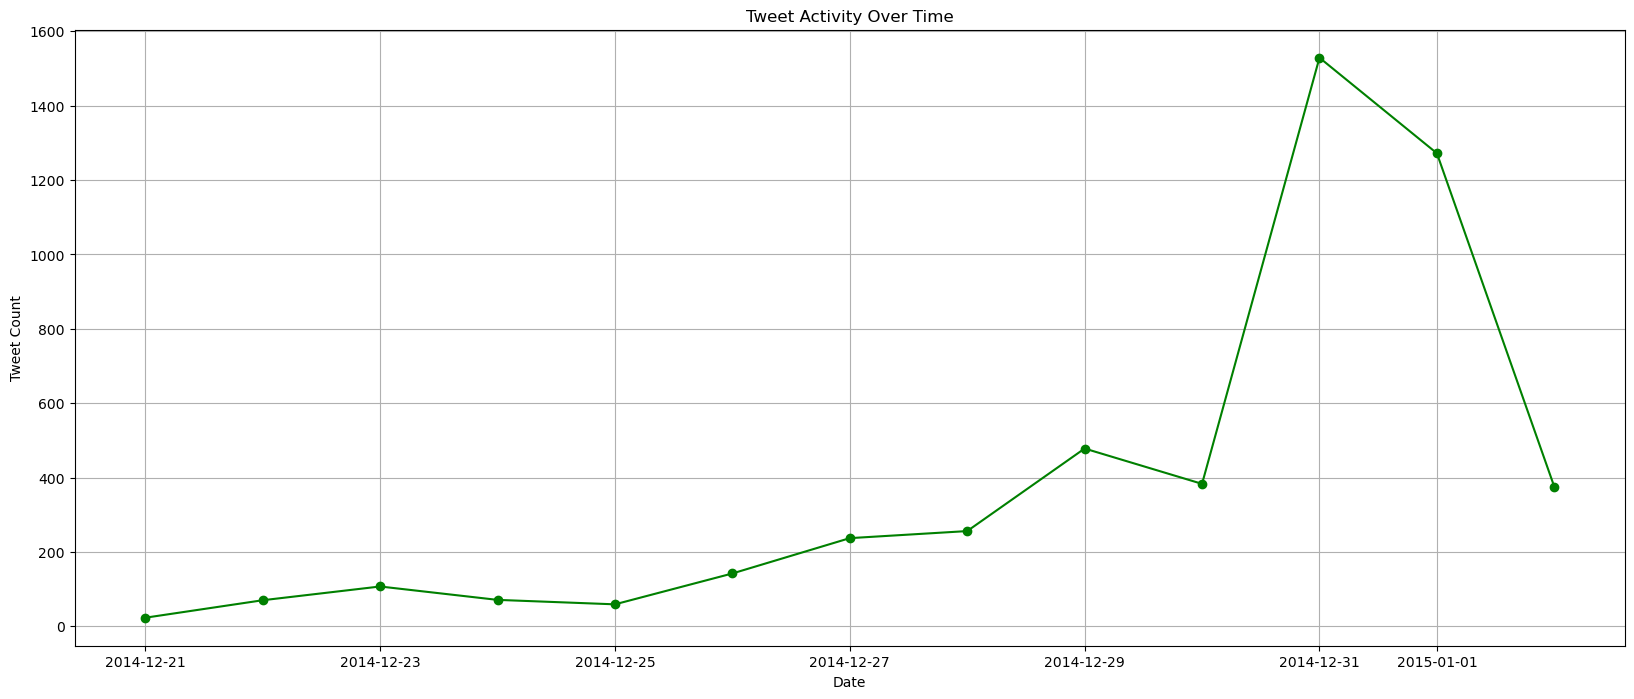

In [21]:
# Analyze tweet activity by day
tweet_activity = df['tweet_date'].dt.date.value_counts().sort_index()
plt.figure(figsize=(20, 8))
tweet_activity.plot(kind='line', color='green', marker='o')
plt.title("Tweet Activity Over Time")
plt.xlabel("Date")
plt.ylabel("Tweet Count")
plt.grid()
plt.show()

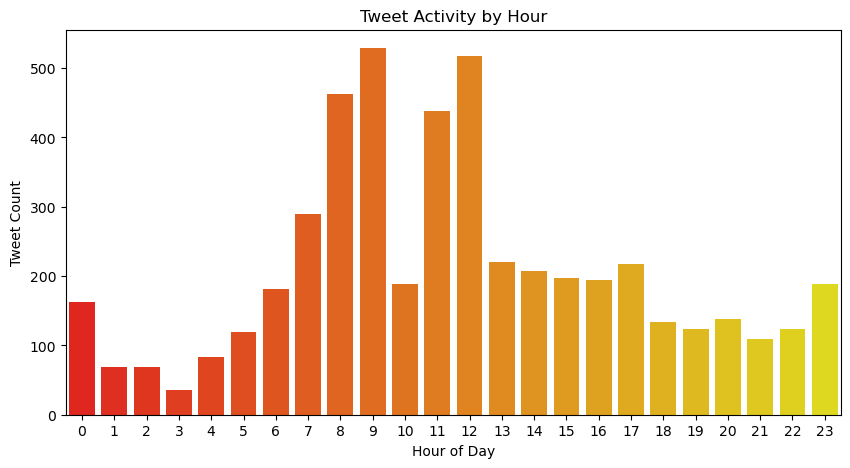

In [22]:
# Analyze tweet activity by hour (if tweet_created contains time)
df['tweet_hour'] = pd.to_datetime(df['tweet_created']).dt.hour
hourly_activity = df['tweet_hour'].value_counts().sort_index()
plt.figure(figsize=(10, 5))
sns.barplot(x=hourly_activity.index, y=hourly_activity.values, palette="autumn")
plt.title("Tweet Activity by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Tweet Count")
plt.show()

In [23]:
df.columns

Index(['resolution_topics', 'gender', 'name', 'resolution_category',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created', 'tweet_date',
       'tweet_id', 'tweet_location', 'tweet_state', 'user_timezone',
       'tweet_region', 'tweet_hour'],
      dtype='object')

## Sentiment Analysis (Optional for Early Insights)

In [25]:
!pip install textblob
from textblob import TextBlob

# Calculate sentiment polarity for each tweet
df['sentiment'] = df['text'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
df

resolution_topics  gender  \
0                                         Eat healthier  female   
1     Humor about Personal Growth and Interests Reso...  female   
2                                     Be More Confident    male   
3                                                 Other    male   
4                                      Be more positive  female   
...                                                 ...     ...   
4997                                       Go to Europe  female   
4998  Humor about Family/Friends/Relationships Resol...  female   
4999  Humor about Personal Growth and Interests Reso...  female   
5000                                     Join a startup  female   
5001                                    Improve my body  female   

                 name   resolution_category  retweet_count  \
0         Dena_Marina      Health & Fitness            0.0   
1        ninjagirl325                 Humor            1.0   
2        RickyDelReyy       Personal Growth            0.0   
3           CalmareNJ         Philanthropic            0.0   
4     welovatoyoudemi       Personal Growth            0.0   
...               ...                   ...            ...   
4997      MarthaH1224  Recreation & Leisure            NaN   
4998      rositajones                 Humor            NaN   
4999   mylifeisdelish                 Humor            NaN   
5000      itsmeJajael                Career            NaN   
5001     _LeahHarrell      Health & Fitness            NaN   

                                                   text tweet_coord  \
0     #NewYearsResolution :: Read more books, No scr...         NaN   
1     #NewYearsResolution Finally master @ZJ10 's pa...         NaN   
2     #NewYearsResolution to stop being so damn perf...         NaN   
3     My #NewYearsResolution is to help my disabled ...         NaN   
4     #NewYearsResolution #2015Goals #2015bucketlist...         NaN   
...                                                 ...         ...   
4997  Tomorrow I start @JustifiedFX because @natalie...         NaN   
4998  holy crap, people. EYES OPEN WHEN DRIVING. #Ne...         NaN   
4999  RT @moJO_SHabby: Start parody of her blog #NYR...         NaN   
5000  RT @kscmaghirang: To have an excellent job bef...         NaN   
5001  RT @tompycan: #NewYearsResolution on Jan1: "I'...         NaN   

            tweet_created tweet_date     tweet_id             tweet_location  \
0     2014-12-31T10:48:00 2014-12-31  5,50363E+17        Southern California   
1     2014-12-31T10:47:00 2014-12-31  5,50363E+17                 New Jersey   
2     2014-12-31T10:46:00 2014-12-31  5,50362E+17                  Hollywood   
3     2014-12-31T10:45:00 2014-12-31  5,50362E+17                  Metro NYC   
4     2014-12-31T10:44:00 2014-12-31  5,50362E+17  Pittsburgh, Pennsylvania    
...                   ...        ...          ...                        ...   
4997  2014-12-31T09:43:00 2014-12-31  5,50346E+17                      NC/TN   
4998  2014-12-31T09:45:00 2014-12-31  5,50347E+17            charleston, nyc   
4999  2014-12-31T09:45:00 2014-12-31  5,50347E+17                    Memphis   
5000  2014-12-31T09:48:00 2014-12-31  5,50348E+17                 Paris  USA   
5001  2014-12-31T09:51:00 2014-12-31  5,50348E+17    shenandoah conservatory   

     tweet_state               user_timezone tweet_region  tweet_hour  \
0             CA  Pacific Time (US & Canada)         West          10   
1             NJ  Central Time (US & Canada)    Northeast          10   
2             CA  Eastern Time (US & Canada)         West          10   
3             NY                         NaN    Northeast          10   
4             PA  Eastern Time (US & Canada)    Northeast          10   
...          ...                         ...          ...         ...   
4997          TN                       Quito        South           9   
4998          NY  Eastern Time (US & Canada)    Northeast           9   
4999          TN 

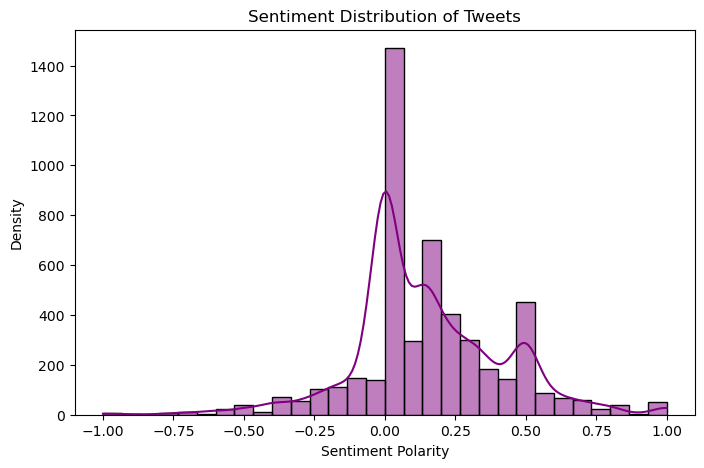

In [26]:
# Sentiment distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['sentiment'], kde=True, color='purple', bins=30)
plt.title("Sentiment Distribution of Tweets")
plt.xlabel("Sentiment Polarity")
plt.ylabel("Density")
plt.show()

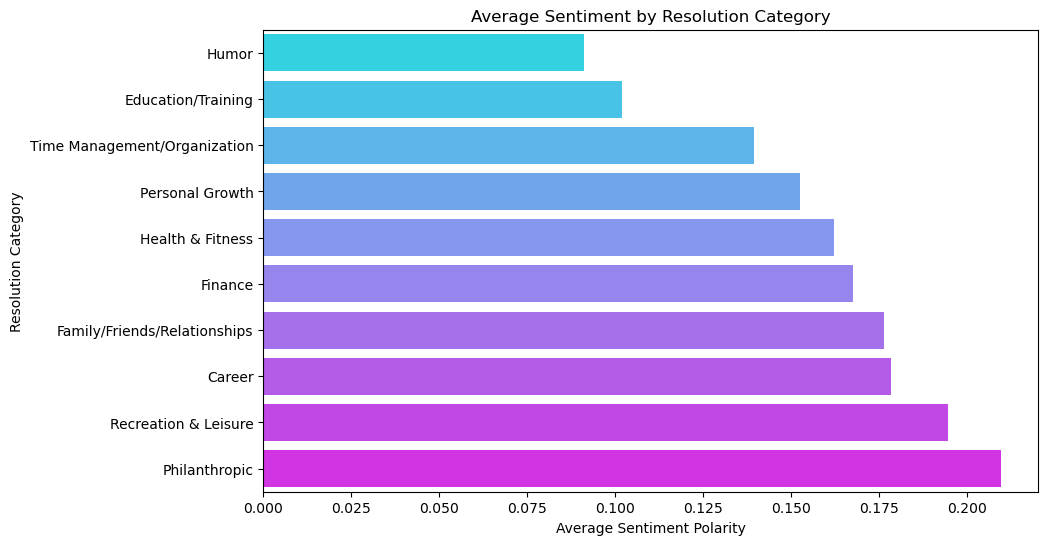

In [27]:
# Average sentiment by resolution category
avg_sentiment_category = df.groupby('resolution_category')['sentiment'].mean().sort_values()
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_sentiment_category.values, y=avg_sentiment_category.index, palette="cool")
plt.title("Average Sentiment by Resolution Category")
plt.xlabel("Average Sentiment Polarity")
plt.ylabel("Resolution Category")
plt.show()

[Table of Contents](#Table-of-Contents)

# Step 2: Data Understanding

In [29]:
print("Dataset Overview:")
print(df.head())
print("\nColumns and Data Types:")
print(df.info())

# Check missing values
print("\nMissing Values Count:")
print(df.isnull().sum())

# Basic descriptive statistics for numeric columns
print("\nDescriptive Statistics for Numeric Columns:")
print(df.describe())

# Value counts for categorical columns (e.g., 'gender', 'resolution_category')
print("\nValue Counts for 'resolution_category':")
print(df['resolution_category'].value_counts())

Dataset Overview:
                                   resolution_topics  gender             name  \
0                                      Eat healthier  female      Dena_Marina   
1  Humor about Personal Growth and Interests Reso...  female     ninjagirl325   
2                                  Be More Confident    male     RickyDelReyy   
3                                              Other    male        CalmareNJ   
4                                   Be more positive  female  welovatoyoudemi   

  resolution_category  retweet_count  \
0    Health & Fitness            0.0   
1               Humor            1.0   
2     Personal Growth            0.0   
3       Philanthropic            0.0   
4     Personal Growth            0.0   

                                                text tweet_coord  \
0  #NewYearsResolution :: Read more books, No scr...         NaN   
1  #NewYearsResolution Finally master @ZJ10 's pa...         NaN   
2  #NewYearsResolution to stop being so damn perf.

In [30]:
df['tweet_coord'].fillna("[0, 0]", inplace=True)
df['retweet_count'].fillna(df['retweet_count'].mean(), inplace=True)
df['user_timezone'].fillna(df['user_timezone'].mode()[0], inplace=True)

print("\nMissing Values After Handling:")
print(df.isnull().sum())


Missing Values After Handling:
resolution_topics      0
gender                 0
name                   0
resolution_category    0
retweet_count          0
text                   0
tweet_coord            0
tweet_created          0
tweet_date             0
tweet_id               0
tweet_location         0
tweet_state            0
user_timezone          0
tweet_region           0
tweet_hour             0
sentiment              0
dtype: int64


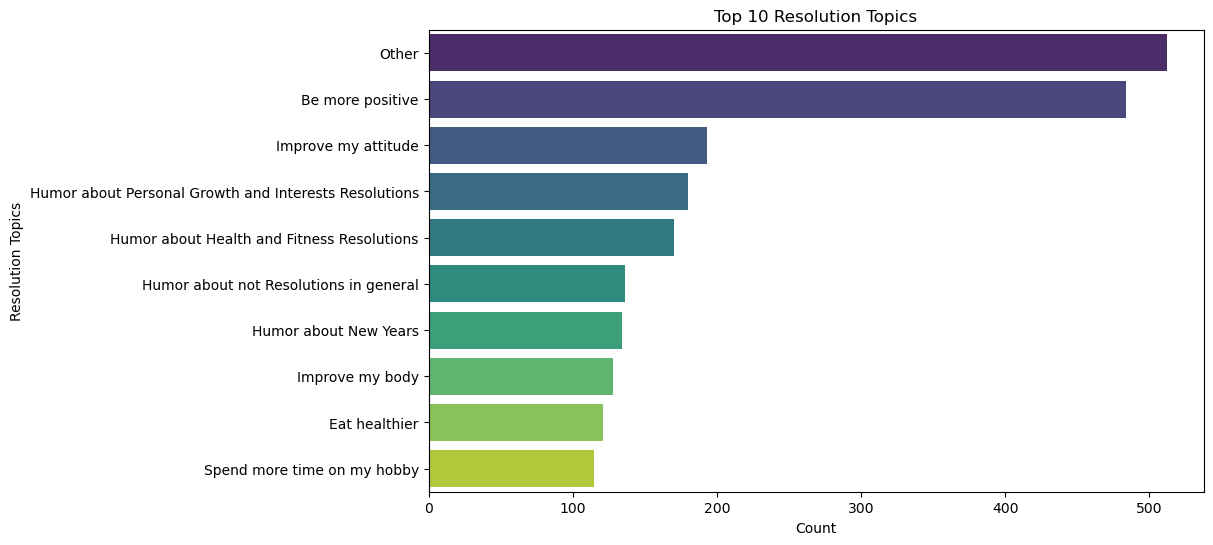

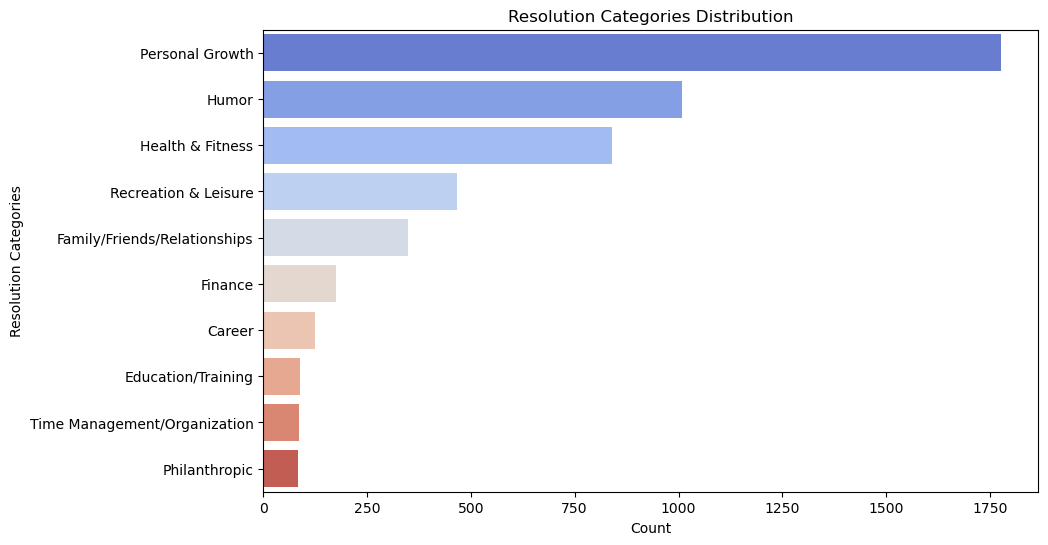

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Top resolution topics
top_topics = df['resolution_topics'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_topics.values, y=top_topics.index, palette="viridis")
plt.title("Top 10 Resolution Topics")
plt.xlabel("Count")
plt.ylabel("Resolution Topics")
plt.show()

# Top resolution categories
top_categories = df['resolution_category'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=top_categories.values, y=top_categories.index, palette="coolwarm")
plt.title("Resolution Categories Distribution")
plt.xlabel("Count")
plt.ylabel("Resolution Categories")
plt.show()

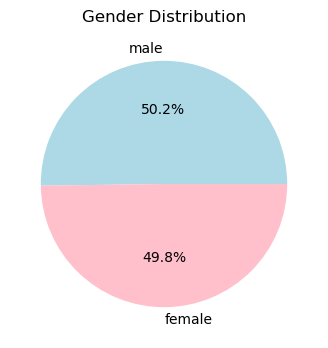

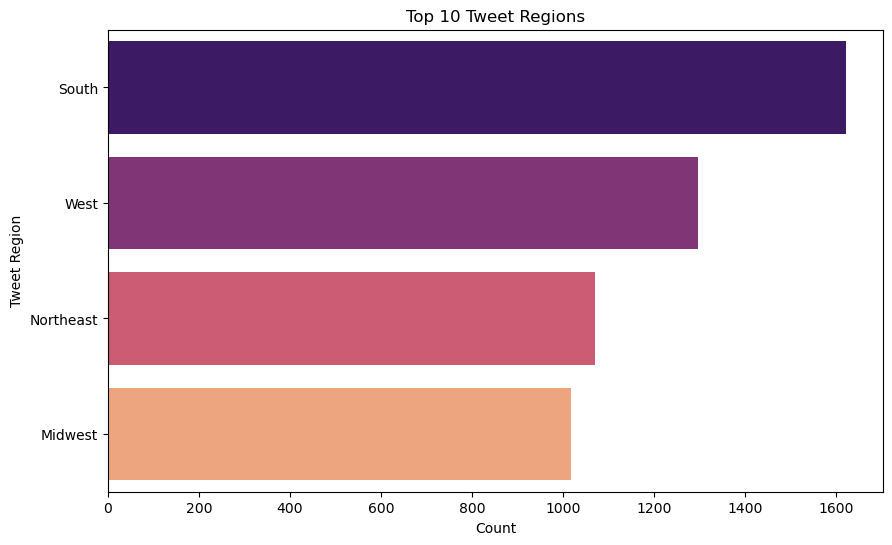

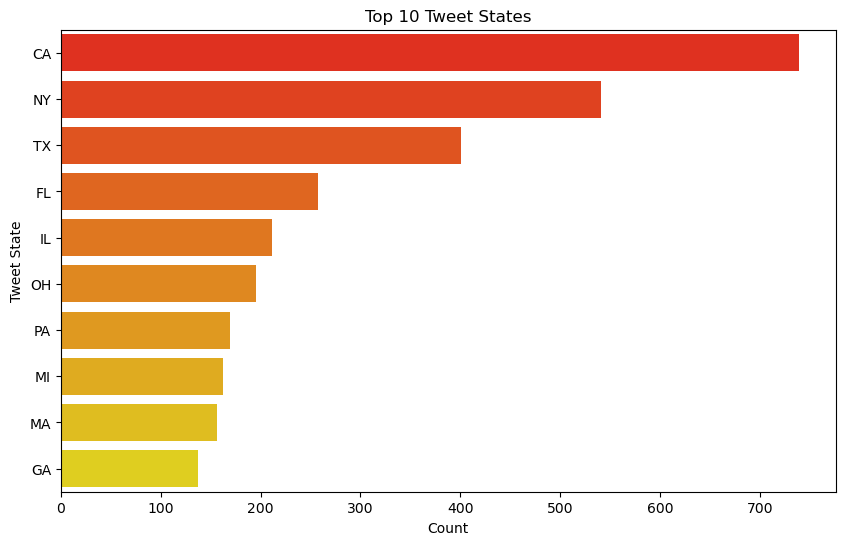

In [32]:
# Gender distribution
plt.figure(figsize=(6, 4))
df['gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'pink', 'gray'])
plt.title("Gender Distribution")
plt.ylabel("")
plt.show()

# Top 10 tweet regions
top_regions = df['tweet_region'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_regions.values, y=top_regions.index, palette="magma")
plt.title("Top 10 Tweet Regions")
plt.xlabel("Count")
plt.ylabel("Tweet Region")
plt.show()

# Top 10 tweet states
top_states = df['tweet_state'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_states.values, y=top_states.index, palette="autumn")
plt.title("Top 10 Tweet States")
plt.xlabel("Count")
plt.ylabel("Tweet State")
plt.show()

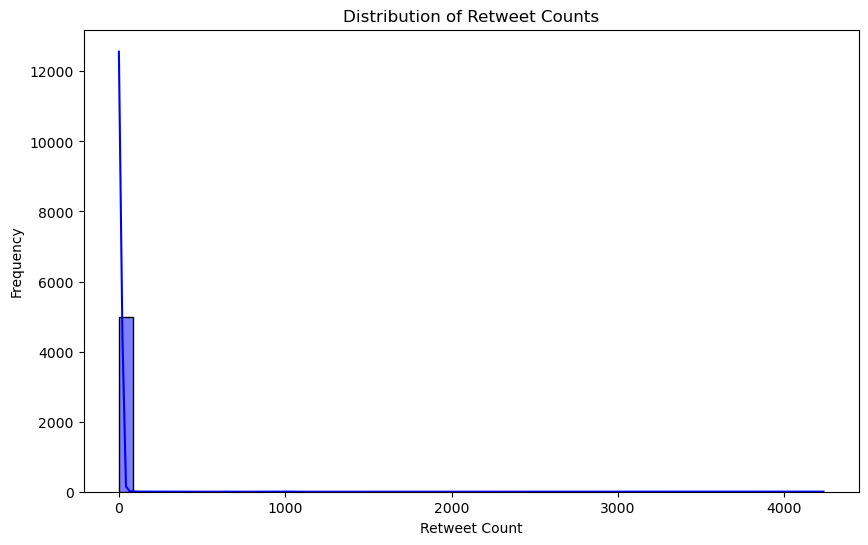

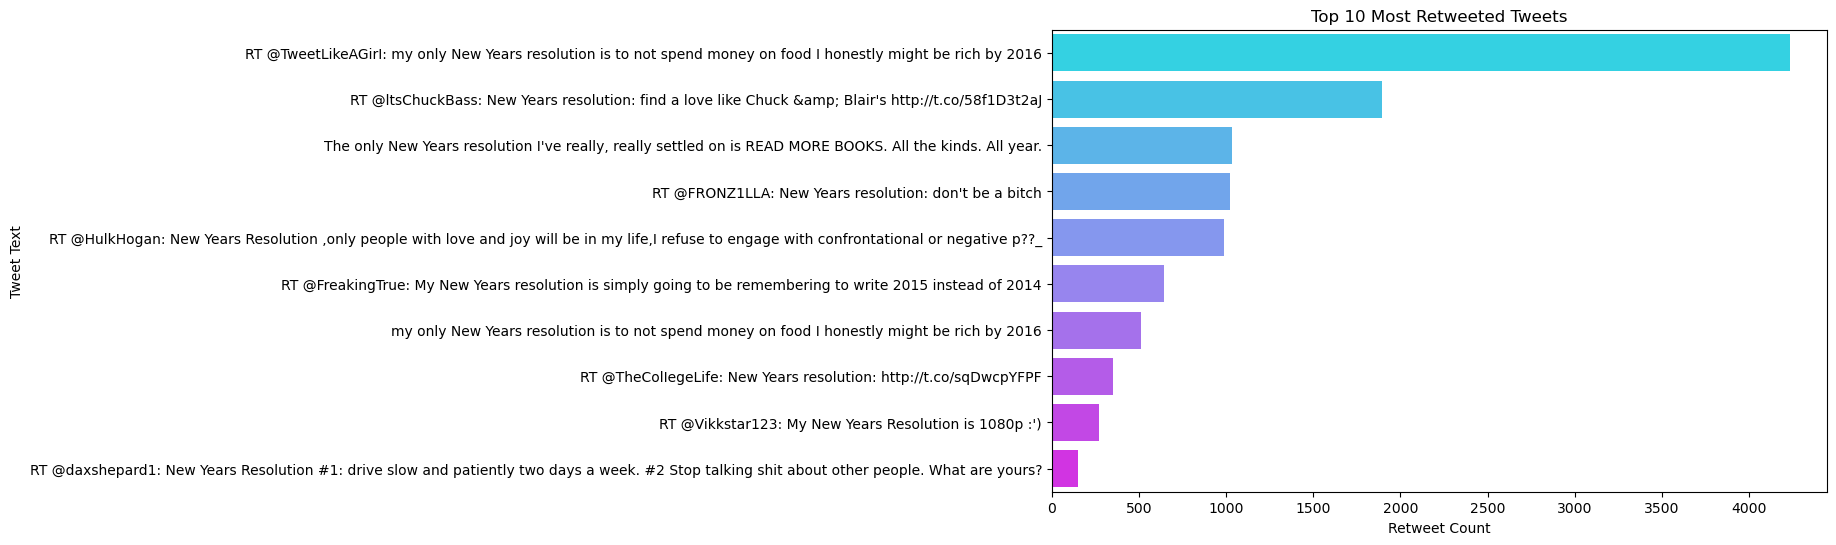

In [33]:
# Retweet count distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['retweet_count'], bins=50, kde=True, color='blue')
plt.title("Distribution of Retweet Counts")
plt.xlabel("Retweet Count")
plt.ylabel("Frequency")
plt.show()

# Top 10 most retweeted tweets
top_retweeted = df.sort_values(by='retweet_count', ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_retweeted['retweet_count'], y=top_retweeted['text'], palette="cool")
plt.title("Top 10 Most Retweeted Tweets")
plt.xlabel("Retweet Count")
plt.ylabel("Tweet Text")
plt.show()

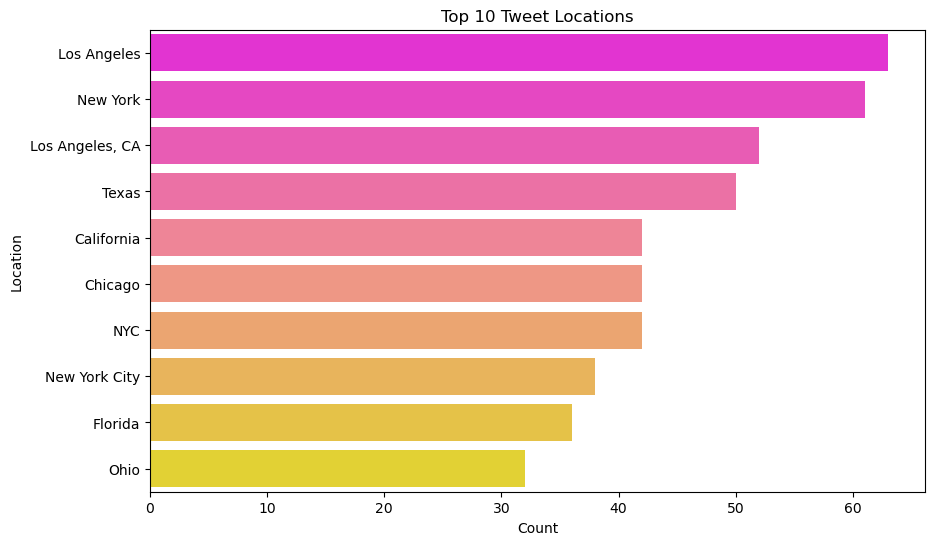

In [34]:
# Top 10 tweet locations
top_locations = df['tweet_location'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_locations.values, y=top_locations.index, palette="spring")
plt.title("Top 10 Tweet Locations")
plt.xlabel("Count");
plt.ylabel("Location")
plt.show()

In [35]:
!pip install folium
import folium

# Create a map centered on a general location
tweet_map = folium.Map(location=[20, 0], zoom_start=2)

# Add markers for available coordinates (if 'tweet_coord' contains lat/lon pairs as strings)
if 'tweet_coord' in df.columns:
    for coord in df['tweet_coord'].dropna():
        lat, lon = map(float, coord.strip("[]").split(","))
        folium.CircleMarker(location=[lat, lon], radius=2, color='blue', fill=True).add_to(tweet_map)

# Display the map
tweet_map.save("tweet_activity_map.html")
print("Map saved as 'tweet_activity_map.html'. Open it in your browser to view.")

Map saved as 'tweet_activity_map.html'. Open it in your browser to view.


# Step 3: Data Preparation

In [37]:
df.isnull().sum()

resolution_topics      0
gender                 0
name                   0
resolution_category    0
retweet_count          0
text                   0
tweet_coord            0
tweet_created          0
tweet_date             0
tweet_id               0
tweet_location         0
tweet_state            0
user_timezone          0
tweet_region           0
tweet_hour             0
sentiment              0
dtype: int64

In [38]:
df['gender'] = df['gender'].str.strip().str.lower()
df['tweet_region'] = df['tweet_region'].str.strip().str.title()
df

resolution_topics  gender  \
0                                         Eat healthier  female   
1     Humor about Personal Growth and Interests Reso...  female   
2                                     Be More Confident    male   
3                                                 Other    male   
4                                      Be more positive  female   
...                                                 ...     ...   
4997                                       Go to Europe  female   
4998  Humor about Family/Friends/Relationships Resol...  female   
4999  Humor about Personal Growth and Interests Reso...  female   
5000                                     Join a startup  female   
5001                                    Improve my body  female   

                 name   resolution_category  retweet_count  \
0         Dena_Marina      Health & Fitness       0.000000   
1        ninjagirl325                 Humor       1.000000   
2        RickyDelReyy       Personal Growth       0.000000   
3           CalmareNJ         Philanthropic       0.000000   
4     welovatoyoudemi       Personal Growth       0.000000   
...               ...                   ...            ...   
4997      MarthaH1224  Recreation & Leisure       4.486607   
4998      rositajones                 Humor       4.486607   
4999   mylifeisdelish                 Humor       4.486607   
5000      itsmeJajael                Career       4.486607   
5001     _LeahHarrell      Health & Fitness       4.486607   

                                                   text tweet_coord  \
0     #NewYearsResolution :: Read more books, No scr...      [0, 0]   
1     #NewYearsResolution Finally master @ZJ10 's pa...      [0, 0]   
2     #NewYearsResolution to stop being so damn perf...      [0, 0]   
3     My #NewYearsResolution is to help my disabled ...      [0, 0]   
4     #NewYearsResolution #2015Goals #2015bucketlist...      [0, 0]   
...                                                 ...         ...   
4997  Tomorrow I start @JustifiedFX because @natalie...      [0, 0]   
4998  holy crap, people. EYES OPEN WHEN DRIVING. #Ne...      [0, 0]   
4999  RT @moJO_SHabby: Start parody of her blog #NYR...      [0, 0]   
5000  RT @kscmaghirang: To have an excellent job bef...      [0, 0]   
5001  RT @tompycan: #NewYearsResolution on Jan1: "I'...      [0, 0]   

            tweet_created tweet_date     tweet_id             tweet_location  \
0     2014-12-31T10:48:00 2014-12-31  5,50363E+17        Southern California   
1     2014-12-31T10:47:00 2014-12-31  5,50363E+17                 New Jersey   
2     2014-12-31T10:46:00 2014-12-31  5,50362E+17                  Hollywood   
3     2014-12-31T10:45:00 2014-12-31  5,50362E+17                  Metro NYC   
4     2014-12-31T10:44:00 2014-12-31  5,50362E+17  Pittsburgh, Pennsylvania    
...                   ...        ...          ...                        ...   
4997  2014-12-31T09:43:00 2014-12-31  5,50346E+17                      NC/TN   
4998  2014-12-31T09:45:00 2014-12-31  5,50347E+17            charleston, nyc   
4999  2014-12-31T09:45:00 2014-12-31  5,50347E+17                    Memphis   
5000  2014-12-31T09:48:00 2014-12-31  5,50348E+17                 Paris  USA   
5001  2014-12-31T09:51:00 2014-12-31  5,50348E+17    shenandoah conservatory   

     tweet_state               user_timezone tweet_region  tweet_hour  \
0             CA  Pacific Time (US & Canada)         West          10   
1             NJ  Central Time (US & Canada)    Northeast          10   
2             CA  Eastern Time (US & Canada)         West          10   
3             NY  Eastern Time (US & Canada)    Northeast          10   
4             PA  Eastern Time (US & Canada)    Northeast          10   
...          ...                         ...          ...         ...   
4997          TN                       Quito        South           9   
4998          NY  Eastern Time (US & Canada)    Northeast           9   
4999          TN 

In [39]:
import re

def clean_text(text):
    text = re.sub(r'http\S+|www\S+', '', text)  # Remove URLs
    text = re.sub(r'@\w+', '', text)  # Remove mentions
    text = re.sub(r'#', '', text)  # Remove hashtags
    text = re.sub(r'[^A-Za-z0-9\s]', '', text)  # Remove special characters
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    return text.strip()

df['text_cleaned'] = df['text'].apply(clean_text)


In [40]:
df

resolution_topics  gender  \
0                                         Eat healthier  female   
1     Humor about Personal Growth and Interests Reso...  female   
2                                     Be More Confident    male   
3                                                 Other    male   
4                                      Be more positive  female   
...                                                 ...     ...   
4997                                       Go to Europe  female   
4998  Humor about Family/Friends/Relationships Resol...  female   
4999  Humor about Personal Growth and Interests Reso...  female   
5000                                     Join a startup  female   
5001                                    Improve my body  female   

                 name   resolution_category  retweet_count  \
0         Dena_Marina      Health & Fitness       0.000000   
1        ninjagirl325                 Humor       1.000000   
2        RickyDelReyy       Personal Growth       0.000000   
3           CalmareNJ         Philanthropic       0.000000   
4     welovatoyoudemi       Personal Growth       0.000000   
...               ...                   ...            ...   
4997      MarthaH1224  Recreation & Leisure       4.486607   
4998      rositajones                 Humor       4.486607   
4999   mylifeisdelish                 Humor       4.486607   
5000      itsmeJajael                Career       4.486607   
5001     _LeahHarrell      Health & Fitness       4.486607   

                                                   text tweet_coord  \
0     #NewYearsResolution :: Read more books, No scr...      [0, 0]   
1     #NewYearsResolution Finally master @ZJ10 's pa...      [0, 0]   
2     #NewYearsResolution to stop being so damn perf...      [0, 0]   
3     My #NewYearsResolution is to help my disabled ...      [0, 0]   
4     #NewYearsResolution #2015Goals #2015bucketlist...      [0, 0]   
...                                                 ...         ...   
4997  Tomorrow I start @JustifiedFX because @natalie...      [0, 0]   
4998  holy crap, people. EYES OPEN WHEN DRIVING. #Ne...      [0, 0]   
4999  RT @moJO_SHabby: Start parody of her blog #NYR...      [0, 0]   
5000  RT @kscmaghirang: To have an excellent job bef...      [0, 0]   
5001  RT @tompycan: #NewYearsResolution on Jan1: "I'...      [0, 0]   

            tweet_created tweet_date     tweet_id             tweet_location  \
0     2014-12-31T10:48:00 2014-12-31  5,50363E+17        Southern California   
1     2014-12-31T10:47:00 2014-12-31  5,50363E+17                 New Jersey   
2     2014-12-31T10:46:00 2014-12-31  5,50362E+17                  Hollywood   
3     2014-12-31T10:45:00 2014-12-31  5,50362E+17                  Metro NYC   
4     2014-12-31T10:44:00 2014-12-31  5,50362E+17  Pittsburgh, Pennsylvania    
...                   ...        ...          ...                        ...   
4997  2014-12-31T09:43:00 2014-12-31  5,50346E+17                      NC/TN   
4998  2014-12-31T09:45:00 2014-12-31  5,50347E+17            charleston, nyc   
4999  2014-12-31T09:45:00 2014-12-31  5,50347E+17                    Memphis   
5000  2014-12-31T09:48:00 2014-12-31  5,50348E+17                 Paris  USA   
5001  2014-12-31T09:51:00 2014-12-31  5,50348E+17    shenandoah conservatory   

     tweet_state               user_timezone tweet_region  tweet_hour  \
0             CA  Pacific Time (US & Canada)         West          10   
1             NJ  Central Time (US & Canada)    Northeast          10   
2             CA  Eastern Time (US & Canada)         West          10   
3             NY  Eastern Time (US & Canada)    Northeast          10   
4             PA  Eastern Time (US & Canada)    Northeast          10   
...          ...                         ...          ...         ...   
4997          TN                       Quito        South           9   
4998          NY  Eastern Time (US & Canada)    Northeast           9   
4999          TN 

In [41]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Download required NLTK resources
nltk.download('punkt')
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    tokens = word_tokenize(text)  # Tokenize text
    return ' '.join([lemmatizer.lemmatize(word) for word in tokens])

# Apply lemmatization to the cleaned text
df['text_cleaned'] = df['text_cleaned'].apply(lemmatize_text)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Tuba\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Tuba\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [42]:
# from textblob import TextBlob

# # Compute sentiment polarity (ranges from -1 to 1)
# df['sentiment_score'] = df['text_cleaned'].apply(lambda x: TextBlob(x).sentiment.polarity)
# # df['final_sentiment_label'] = df['sentiment_score'].apply(lambda x: 'Positive' if x > 0 else 'Negative' if x < 0 else 'Neutral')
# df['sentiment_label'] = df['sentiment_score'].apply(
#     lambda x: 'Positive' if x > 0.2 else 'Negative' if x < -0.2 else 'Neutral'
# )

In [43]:
# !pip install tf-keras
# !pip install transformers
# from transformers import pipeline

# # Use a pre-trained model for sentiment analysis
# sentiment_analyzer = pipeline("sentiment-analysis")

# # Apply sentiment analysis
# df['sentiment_label'] = df['text_cleaned'].apply(lambda x: sentiment_analyzer(x)[0]['label'])

In [44]:
!pip install vaderSentiment

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize VADER analyzer
analyzer = SentimentIntensityAnalyzer()
#analyzer.lexicon.update({'resolution': 0.5, 'achievement': 0.8, 'goal': 0.5, 'failure': -0.6, 'improvement': 0.7})  # Custom weights

# Apply VADER sentiment analysis
df['sentiment_score'] = df['text_cleaned'].apply(lambda x: analyzer.polarity_scores(x)['compound'])
df['final_sentiment_label'] = df['sentiment_score'].apply(
    lambda score: 'Positive' if score > 0.2 else ('Negative' if score < -0.2 else 'Neutral')
)

In [45]:
from sklearn.utils import resample

# Separate majority and minority classes
positive = df[df['final_sentiment_label'] == 'Positive']
negative = df[df['final_sentiment_label'] == 'Negative']
neutral = df[df['final_sentiment_label'] == 'Neutral']

# Upsample minority classes
positive_upsampled = resample(positive, replace=True, n_samples=len(neutral), random_state=42)
negative_upsampled = resample(negative, replace=True, n_samples=len(neutral), random_state=42)

# Combine back
df_balanced = pd.concat([neutral, positive_upsampled, negative_upsampled])

In [46]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.feature_extraction.text import CountVectorizer
# from sklearn.model_selection import train_test_split

# # Vectorize text data
# vectorizer = CountVectorizer(max_features=1000)
# X_text = vectorizer.fit_transform(df['text_cleaned']).toarray()

# # Combine VADER scores with text features
# X = pd.concat([pd.DataFrame(X_text), df[['sentiment_score']]], axis=1)
# # Convert column names to strings
# X.columns = X.columns.astype(str)
# y = df['final_sentiment_label']

# # Train-test split and model training
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# model = RandomForestClassifier()
# model.fit(X_train, y_train)

# # Evaluate
# y_pred = model.predict(X_test)
# from sklearn.metrics import accuracy_score
# print(f"Accuracy: {accuracy_score(y_test, y_pred):.2%}")

In [47]:
df['final_sentiment_label'].unique()

array(['Neutral', 'Negative', 'Positive'], dtype=object)

In [48]:
df_balanced['tweet_date'] = pd.to_datetime(df_balanced['tweet_date'])
df_balanced['tweet_created'] = pd.to_datetime(df_balanced['tweet_created'])

# Extract features
df_balanced['tweet_hour'] = df_balanced['tweet_created'].dt.hour
df_balanced['tweet_day'] = df_balanced['tweet_date'].dt.day
df_balanced['tweet_month'] = df_balanced['tweet_date'].dt.month
df_balanced['tweet_weekday'] = df_balanced['tweet_date'].dt.day_name()  # Day of the week

In [49]:
df.columns

Index(['resolution_topics', 'gender', 'name', 'resolution_category',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created', 'tweet_date',
       'tweet_id', 'tweet_location', 'tweet_state', 'user_timezone',
       'tweet_region', 'tweet_hour', 'sentiment', 'text_cleaned',
       'sentiment_score', 'final_sentiment_label'],
      dtype='object')

In [50]:
df_balanced

resolution_topics  gender  \
0                                         Eat healthier  female   
1     Humor about Personal Growth and Interests Reso...  female   
4                                      Be more positive  female   
6                             Take a cross country trip    male   
9                                                 Other  female   
...                                                 ...     ...   
178                              Appreciate what I have  female   
2784                                   Make new friends  female   
2185                                   Focus on my self  female   
2026                                   Focus on my self  female   
3518             Humor about not Resolutions in general  female   

                 name           resolution_category  retweet_count  \
0         Dena_Marina              Health & Fitness       0.000000   
1        ninjagirl325                         Humor       1.000000   
4     welovatoyoudemi               Personal Growth       0.000000   
6            jon__bay          Recreation & Leisure       0.000000   
9         yates_amber          Recreation & Leisure       0.000000   
...               ...                           ...            ...   
178      TheInkyKitty               Personal Growth       0.000000   
2784    katiesachampp  Family/Friends/Relationships       0.000000   
2185          uzma961               Personal Growth       1.000000   
2026         iRepWako               Personal Growth       0.000000   
3518   Republican_Mrs                         Humor       4.486607   

                                                   text  \
0     #NewYearsResolution :: Read more books, No scr...   
1     #NewYearsResolution Finally master @ZJ10 's pa...   
4     #NewYearsResolution #2015Goals #2015bucketlist...   
6     My #NewYearsResolution \n\n-Learn how to drive...   
9     #NewYearsResolution to start a hobby, do it on...   
...                                                 ...   
178   2015: - Stop keeping quiet when something upse...   
2784  My New Years resolution is to stop blatantly i...   
2185  RT @tha_indian: My New Years resolution is to ...   
2026  I'm not sure if I'm scared of seeing my blood,...   
3518             #NewYearsResolution stop the liberals.   

                    tweet_coord       tweet_created tweet_date     tweet_id  \
0                        [0, 0] 2014-12-31 10:48:00 2014-12-31  5,50363E+17   
1                        [0, 0] 2014-12-31 10:47:00 2014-12-31  5,50363E+17   
4                        [0, 0] 2014-12-31 10:44:00 2014-12-31  5,50362E+17   
6                        [0, 0] 2014-12-31 10:42:00 2014-12-31  5,50361E+17   
9                        [0, 0] 2014-12-31 10:35:00 2014-12-31   5,5036E+17   
...                         ...                 ...        ...          ...   
178                      [0, 0] 2014-12-31 09:08:00 2014-12-31  5,50338E+17   
2784  [42.9006681, -78.6807063] 2015-01-02 09:44:00 2015-01-02  5,51072E+17   
2185                     [0, 0] 2015-01-01 12:29:00 2015-01-01  5,50751E+17   
2026                     [0, 0] 2014-12-31 22:57:00 2014-12-31  5,50546E+17   
3518                     [0, 0] 2014-12-30 10:47:00 2014-12-30      5,5E+17   

      ...               user_timezone tweet_region tweet_hour sentiment  \
0     ...  Pacific Time (US & Canada)         West         10  0.250000   
1     ...  Central Time (US & Canada)    Northeast         10  0.000000   
4     ...  Eastern Time (US & Canada)    Northeast         10  0.000000   
6     ...                     Tijuana         West         10  0.166667   
9     ...  Eastern Time (US & Canada)        South         10  0.000000   
...   ...                         ...          ...        ...       ...   
178   ...  Eastern Time (US & Canada)        South          9  0.000000   
2784  ...  Central Time (US & Canada)    Northeast          9 -0.181818   
2185  ...  Eastern Time (US & Canada)    Northeast         

[Table of Contents](#Table-of-Contents)

# Step 4: Modelling/Analysis

##  Sentiment Analysis of Resolutions

In [53]:
# Sentiment distribution by resolution topics
sentiment_topics = df_balanced.groupby(['resolution_topics', 'final_sentiment_label']).size().unstack(fill_value=0)

# Sentiment distribution by resolution category
sentiment_categories = df_balanced.groupby(['resolution_category', 'final_sentiment_label']).size().unstack(fill_value=0)

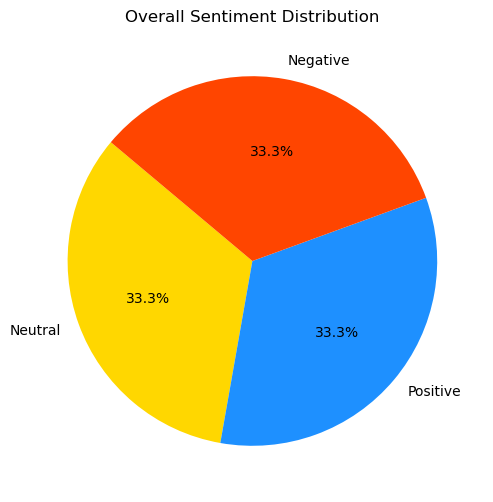

In [54]:
import matplotlib.pyplot as plt

# Overall sentiment distribution
sentiment_overall = df_balanced['final_sentiment_label'].value_counts()

# Pie chart
plt.figure(figsize=(6, 6))
sentiment_overall.plot.pie(autopct='%1.1f%%', startangle=140, colors=['#FFD700', '#1E90FF', '#FF4500'])
plt.title('Overall Sentiment Distribution')
plt.ylabel('')  # Hide y-axis label
plt.show()

<Figure size 1200x800 with 0 Axes>

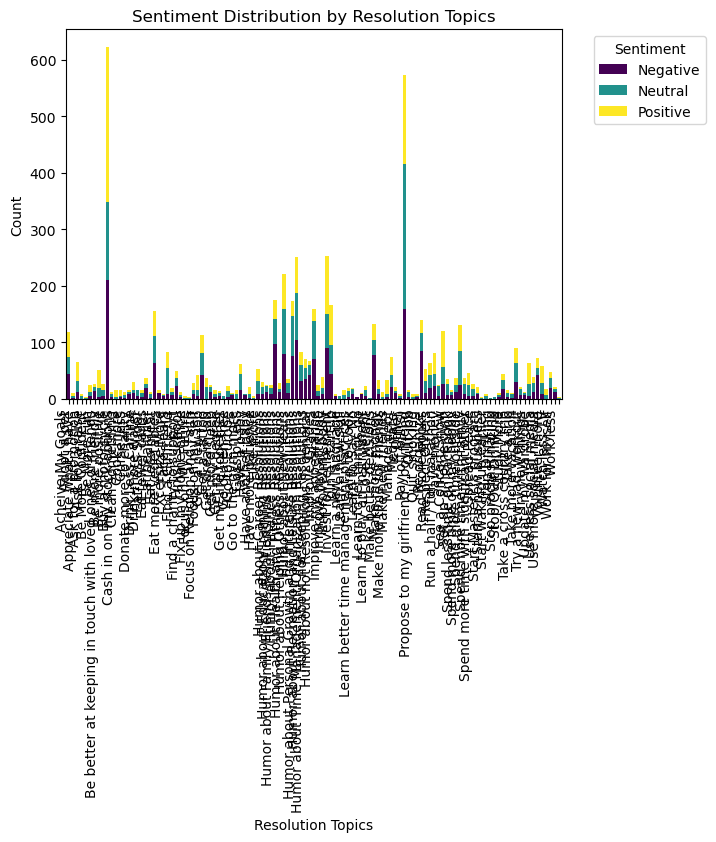

In [55]:
import seaborn as sns

# Plot for resolution topics
plt.figure(figsize=(12, 8))
sentiment_topics.plot(kind='bar', stacked=True, colormap='viridis', width=0.8)
plt.title('Sentiment Distribution by Resolution Topics')
plt.ylabel('Count')
plt.xlabel('Resolution Topics')
plt.xticks(rotation=90, ha='right')
plt.legend(title='Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout(pad=10) 
plt.show()

<Figure size 1200x800 with 0 Axes>

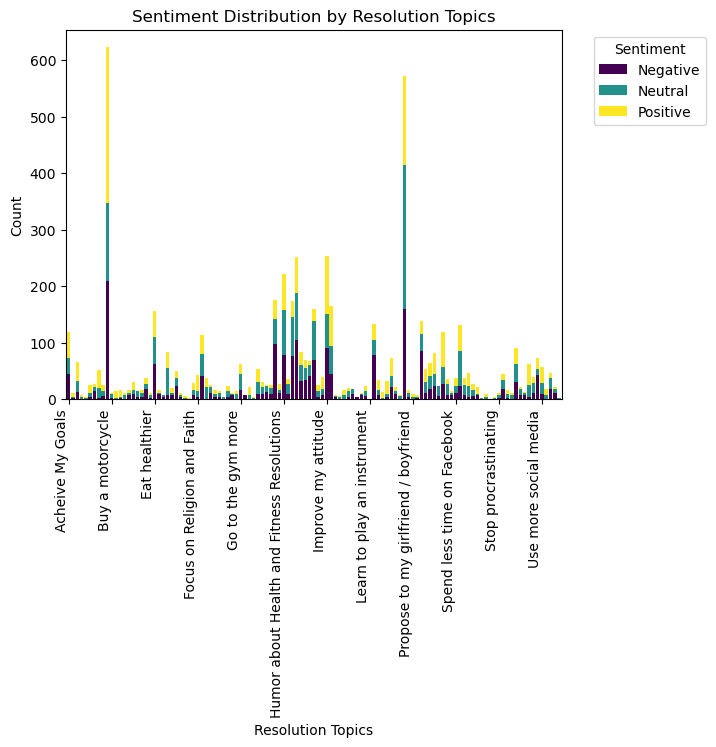

In [56]:
# Plot for resolution topics
plt.figure(figsize=(12, 8))
ax = sentiment_topics.plot(kind='bar', stacked=True, colormap='viridis', width=0.8)

# Customize x-axis labels to show every nth label
step = 10  # Show every 2nd label, adjust as needed
ax.set_xticks(range(len(sentiment_topics.index)))
ax.set_xticklabels(sentiment_topics.index, rotation=90, ha='right')
ax.set_xticks(ax.get_xticks()[::step])

# Customize title, labels, and legend
plt.title('Sentiment Distribution by Resolution Topics')
plt.ylabel('Count')
plt.xlabel('Resolution Topics')

# Adjust legend position and layout
plt.legend(title='Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout(pad=10)
plt.show()

<Figure size 1000x600 with 0 Axes>

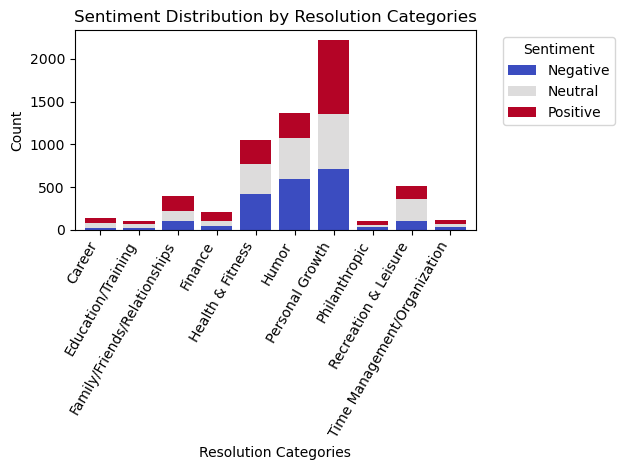

In [57]:
# Plot for resolution categories
plt.figure(figsize=(10, 6))
sentiment_categories.plot(kind='bar', stacked=True, colormap='coolwarm', width=0.8)
plt.title('Sentiment Distribution by Resolution Categories')
plt.ylabel('Count')
plt.xlabel('Resolution Categories')
plt.xticks(rotation=60, ha='right')
plt.legend(title='Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [58]:
df_balanced['tweet_state'], df_balanced['tweet_location'], df_balanced['tweet_coord']

(0       CA
 1       NJ
 4       PA
 6       CA
 9       KY
         ..
 178     NC
 2784    NY
 2185    NJ
 2026    MN
 3518    SC
 Name: tweet_state, Length: 6219, dtype: object,
 0                Southern California
 1                         New Jersey
 4          Pittsburgh, Pennsylvania 
 6                     Santa Cruz, CA
 9                     louisville, ky
                     ...             
 178     Huntersville, North Carolina
 2784              Buffalo, New York 
 2185                              NJ
 2026                       Minnesota
 3518                  South Carolina
 Name: tweet_location, Length: 6219, dtype: object,
 0                          [0, 0]
 1                          [0, 0]
 4                          [0, 0]
 6                          [0, 0]
 9                          [0, 0]
                   ...            
 178                        [0, 0]
 2784    [42.9006681, -78.6807063]
 2185                       [0, 0]
 2026                       [0, 0]

## Resolution Popularity by Location

In [60]:
# Group data by location and state
resolution_by_location = df_balanced.groupby('tweet_location')['tweet_id'].count().sort_values(ascending=False)
resolution_by_state = df_balanced.groupby('tweet_state')['tweet_id'].count().sort_values(ascending=False)

# Display the top locations
print("Top Locations for Resolutions:")
print(resolution_by_location.head(10))

print("\nTop States for Resolutions:")
print(resolution_by_state.head(10))

Top Locations for Resolutions:
tweet_location
New York           88
Los Angeles        79
Texas              73
Los Angeles, CA    62
California         60
NYC                56
New York City      56
Chicago            54
Chicago, IL        52
Boston, MA         46
Name: tweet_id, dtype: int64

Top States for Resolutions:
tweet_state
CA    915
NY    681
TX    507
FL    306
IL    294
MI    226
PA    213
OH    212
MA    188
VA    163
Name: tweet_id, dtype: int64


In [61]:
import folium
from folium.plugins import HeatMap

# Prepare data for HeatMap (ensure tweet_coord is non-null)
df_coords = df_balanced.dropna(subset=['tweet_coord'])
locations = df_coords['tweet_coord'].apply(eval).tolist()

# Create a base map
map_heat = folium.Map(location=[0, 0], zoom_start=2)

# Add HeatMap
HeatMap(locations).add_to(map_heat)

# Save and display the map
map_heat.save("resolution_heatmap.html")
map_heat

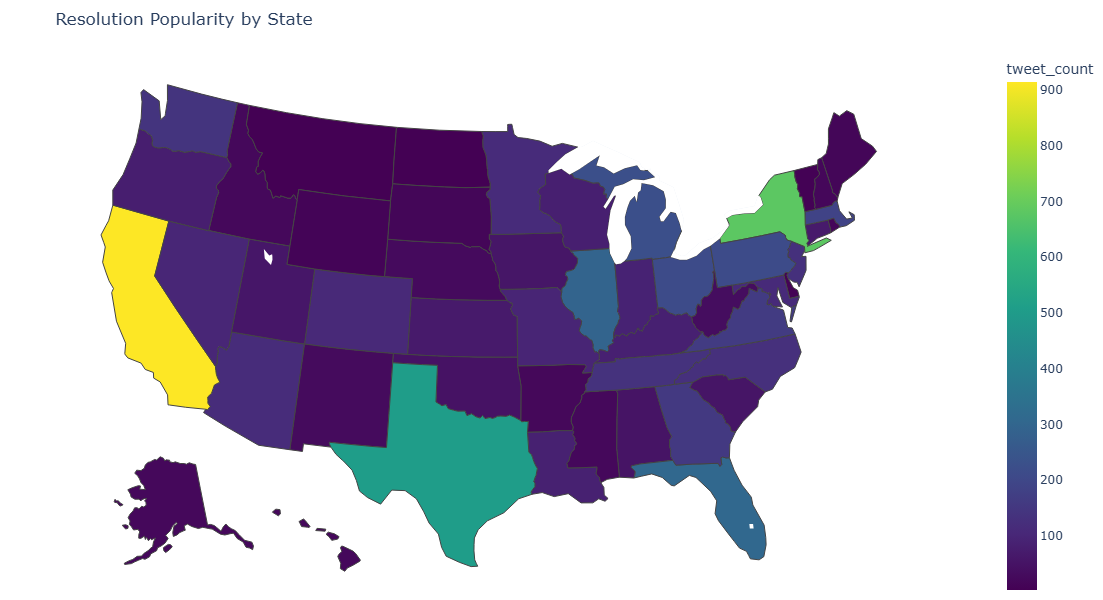

In [62]:
import plotly.express as px

# Group by state and reset index
state_data = df_balanced.groupby('tweet_state')['tweet_id'].count().reset_index()
state_data.columns = ['tweet_state', 'tweet_count']

# Plot resolution density by state
fig = px.choropleth(
    state_data,
    locations='tweet_state',
    locationmode='USA-states',
    scope='usa',
    color='tweet_count',
    color_continuous_scale='Viridis',
    title="Resolution Popularity by State"
)

# Adjust layout for a larger plot
fig.update_layout(
    width=1000,  # Set the width of the plot
    height=600,  # Set the height of the plot
    margin={"r":0, "t":50, "l":0, "b":0}  # Adjust margins
)

fig.show()

In [63]:
hourly_tweets = df_balanced.groupby('tweet_hour')['tweet_id'].count()
daily_tweets = df_balanced.groupby('tweet_day')['tweet_id'].count()

In [64]:
df_balanced.columns

Index(['resolution_topics', 'gender', 'name', 'resolution_category',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created', 'tweet_date',
       'tweet_id', 'tweet_location', 'tweet_state', 'user_timezone',
       'tweet_region', 'tweet_hour', 'sentiment', 'text_cleaned',
       'sentiment_score', 'final_sentiment_label', 'tweet_day', 'tweet_month',
       'tweet_weekday'],
      dtype='object')

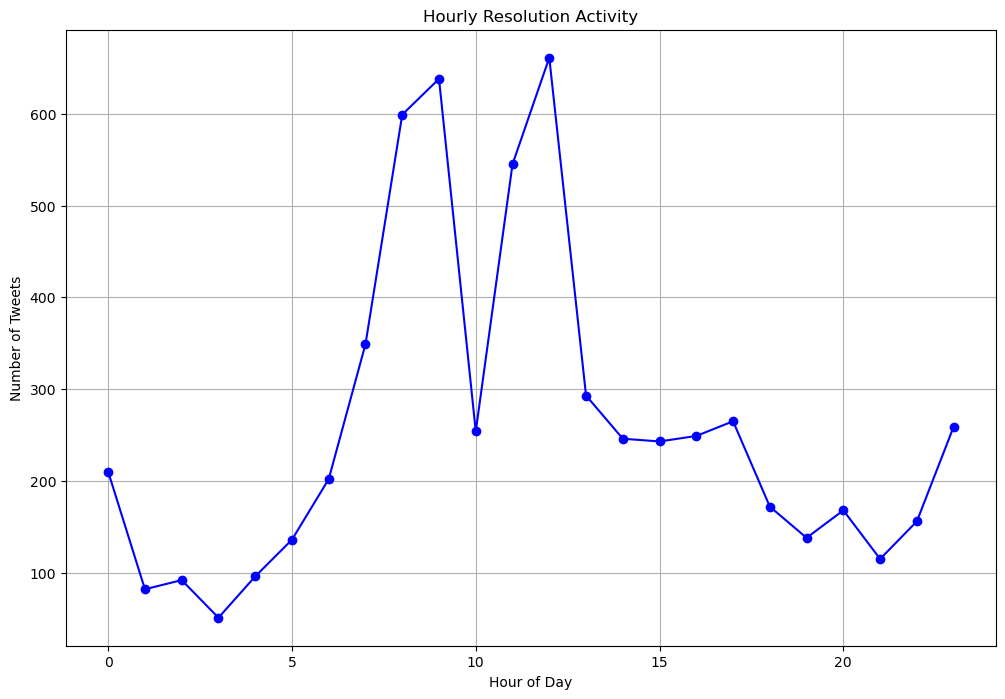

In [65]:
import matplotlib.pyplot as plt

# Hourly trends
plt.figure(figsize=(12, 8))
hourly_tweets.plot(kind='line', marker='o', color='blue')
plt.title("Hourly Resolution Activity")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Tweets")
plt.grid()
plt.show()

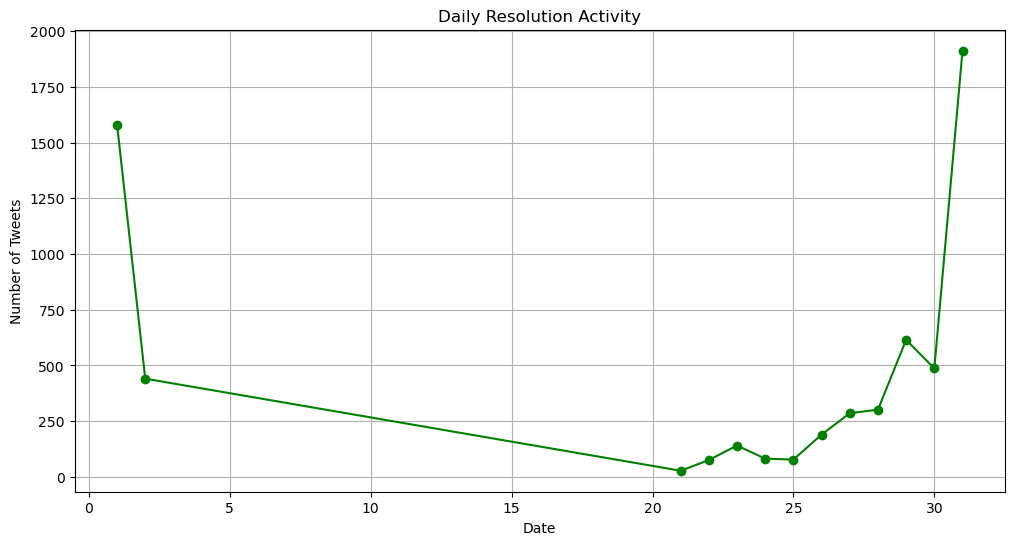

In [66]:
# Daily trends
plt.figure(figsize=(12, 6))
daily_tweets.plot(kind='line', marker='o', color='green')
plt.title("Daily Resolution Activity")
plt.xlabel("Date")
plt.ylabel("Number of Tweets")
plt.grid()
plt.show()

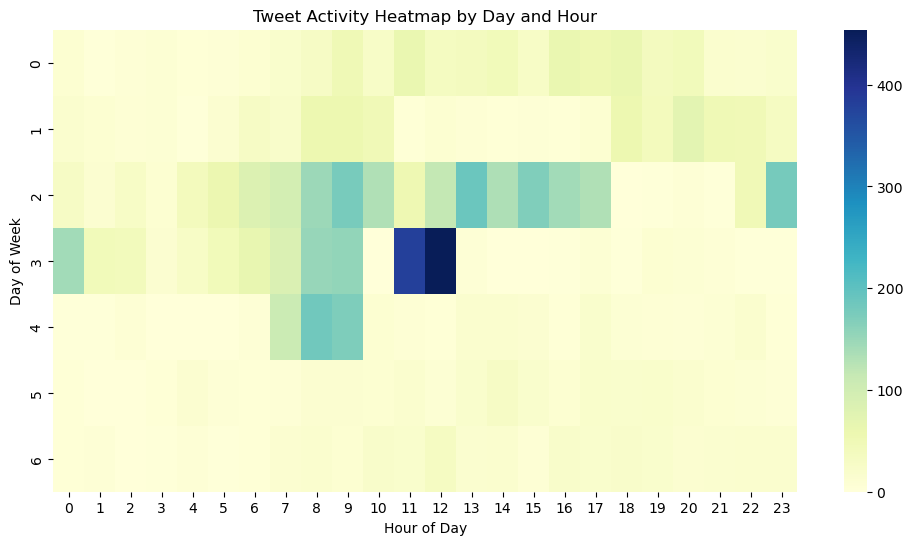

In [67]:
import seaborn as sns

# Prepare data for heatmap
hour_day_data = df_balanced.groupby([df_balanced['tweet_created'].dt.weekday, df_balanced['tweet_hour']])['tweet_id'].count().unstack(fill_value=0)

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(hour_day_data, cmap="YlGnBu", annot=False)
plt.title("Tweet Activity Heatmap by Day and Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Day of Week")
plt.show()

## Impact of Retweets on Resolution Categories

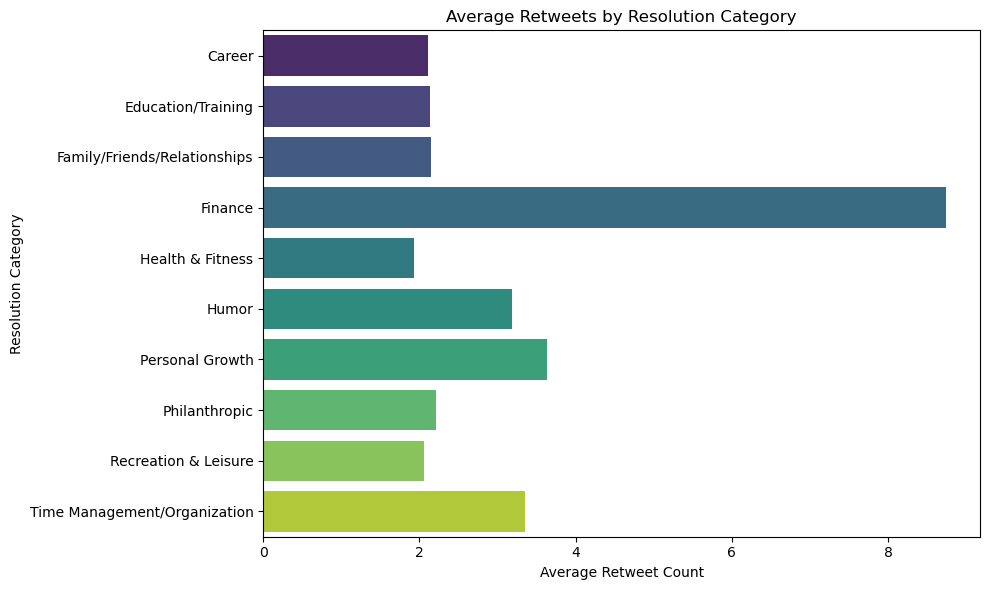

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

# Aggregate retweet counts by resolution category
category_retweets = df_balanced.groupby('resolution_category')['retweet_count'].mean().reset_index()

# Plot average retweet counts by resolution category
plt.figure(figsize=(10, 6))
sns.barplot(x='retweet_count', y='resolution_category', data=category_retweets, palette='viridis')
plt.title('Average Retweets by Resolution Category')
plt.xlabel('Average Retweet Count')
plt.ylabel('Resolution Category')
plt.tight_layout()
plt.show()

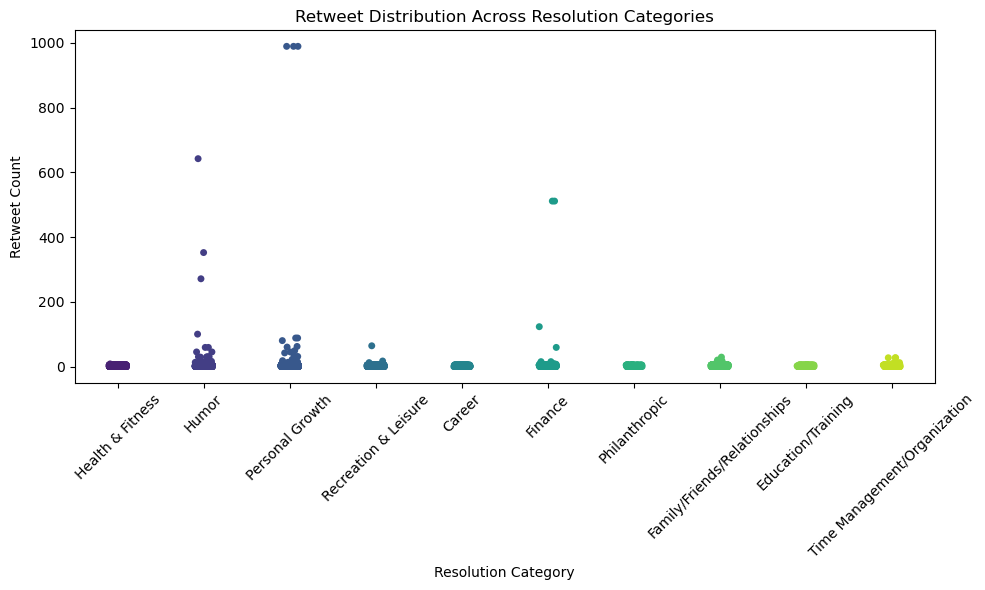

In [70]:
plt.figure(figsize=(10, 6))
sns.stripplot(x='resolution_category', y='retweet_count', data=df_balanced, jitter=True, palette='viridis')
plt.title('Retweet Distribution Across Resolution Categories')
plt.xlabel('Resolution Category')
plt.ylabel('Retweet Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [71]:
# Define viral threshold (top 10%)
viral_threshold = df_balanced['retweet_count'].quantile(0.9)

# Filter viral resolutions
viral_resolutions = df_balanced[df_balanced['retweet_count'] >= viral_threshold]

# Display sample viral resolutions
viral_resolutions[['resolution_category', 'text_cleaned', 'retweet_count']].head()

resolution_category                                       text_cleaned  \
68      Personal Growth       RT Talk le Touch more TSA NewYearsResolution   
112               Humor  RT I find Calliou and beat him mercilessly New...   
166     Personal Growth  NewYearsResolution le stress smile more ride l...   
218               Humor  RT NewYearsResolution hate everyone oh look at...   
270               Humor  NewYearsResolution sacrifice more boy to the g...   

     retweet_count  
68            11.0  
112            8.0  
166           21.0  
218            6.0  
270            8.0

In [72]:
df_balanced.columns

Index(['resolution_topics', 'gender', 'name', 'resolution_category',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created', 'tweet_date',
       'tweet_id', 'tweet_location', 'tweet_state', 'user_timezone',
       'tweet_region', 'tweet_hour', 'sentiment', 'text_cleaned',
       'sentiment_score', 'final_sentiment_label', 'tweet_day', 'tweet_month',
       'tweet_weekday'],
      dtype='object')

## Text Analysis and Clustering

In [74]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Vectorize text data
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
dtm = vectorizer.fit_transform(df_balanced['text_cleaned'].dropna())

# Apply LDA
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(dtm)

# Display top words per topic
def display_topics(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic #{topic_idx + 1}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[-n_top_words:]]))
        print("\n")

display_topics(lda, vectorizer.get_feature_names_out(), 10)

Topic #1:
year smoking people right day im rt 2015 stop newyearsresolution


Topic #2:
ill better time make amp year le rt 2015 newyearsresolution


Topic #3:
going gon make na money dont im year 2015 newyearsresolution


Topic #4:
learn friend im happynewyear thing need rt stop doing newyearsresolution


Topic #5:
like make 2015 stop newyearsresolution rt year years resolution new




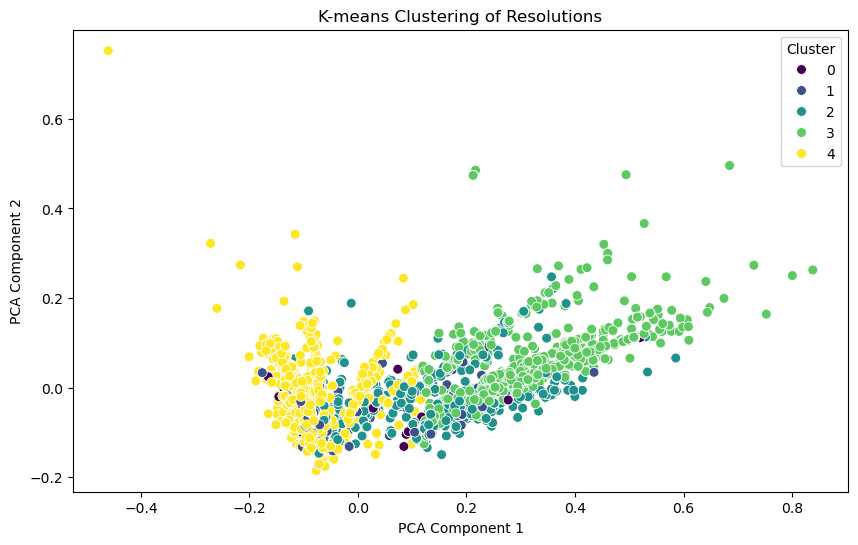

In [75]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(df_balanced['text_cleaned'].dropna())

# Apply K-means
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(tfidf_matrix)

# Add cluster labels to DataFrame
df_balanced['cluster'] = clusters

# Visualize clusters using PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(tfidf_matrix.toarray())

plt.figure(figsize=(10, 6))
sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], hue=clusters, palette='viridis', s=50)
plt.title('K-means Clustering of Resolutions')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

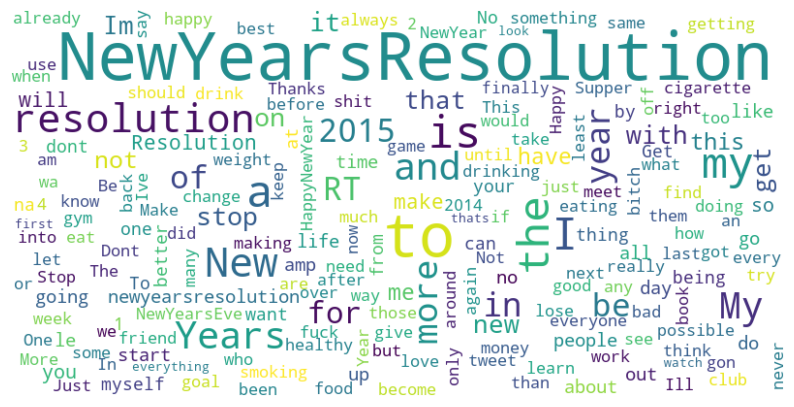

In [76]:
!pip install wordcloud
from collections import Counter
from wordcloud import WordCloud

# Generate word frequency
all_words = " ".join(df_balanced['text_cleaned'].dropna())
word_freq = Counter(all_words.split())

# Plot WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Gender and Region-Based Preferences

In [78]:
# Aggregation for resolution topics by gender
gender_topics = df_balanced.groupby(['gender', 'resolution_topics']).size().unstack().fillna(0)

# Aggregation for resolution categories by region
region_categories = df_balanced.groupby(['tweet_region', 'resolution_category']).size().unstack().fillna(0)

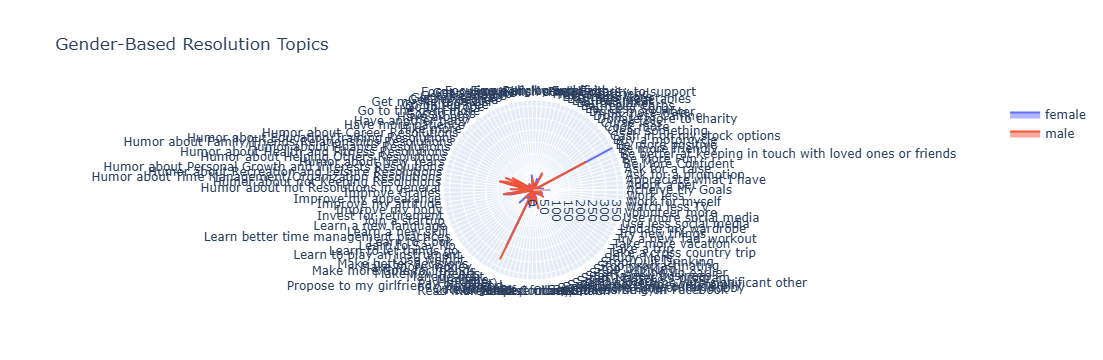

In [79]:
import plotly.graph_objects as go

# Example for two genders
radar_data = gender_topics.T

fig = go.Figure()
for gender in radar_data.columns:
    fig.add_trace(go.Scatterpolar(
        r=radar_data[gender],
        theta=radar_data.index,
        fill='toself',
        name=gender
    ))

fig.update_layout(
    polar=dict(radialaxis=dict(visible=True)),
    title="Gender-Based Resolution Topics"
)
fig.show()

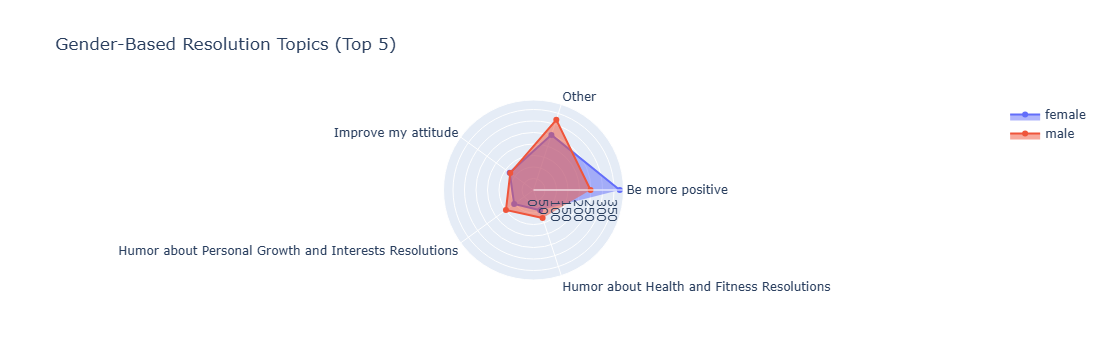

In [80]:
import plotly.graph_objects as go

# Step 1: Filter for top 5 resolution topics by frequency
top_topics = gender_topics.sum(axis=0).sort_values(ascending=False).head(5).index
filtered_data = gender_topics[top_topics].T

# Step 2: Create radar chart
fig = go.Figure()
for gender in filtered_data.columns:
    fig.add_trace(go.Scatterpolar(
        r=filtered_data[gender],
        theta=filtered_data.index,
        fill='toself',
        name=gender
    ))

# Step 3: Update layout for clarity
fig.update_layout(
    polar=dict(radialaxis=dict(visible=True)),
    title="Gender-Based Resolution Topics (Top 5)"
)
fig.show()

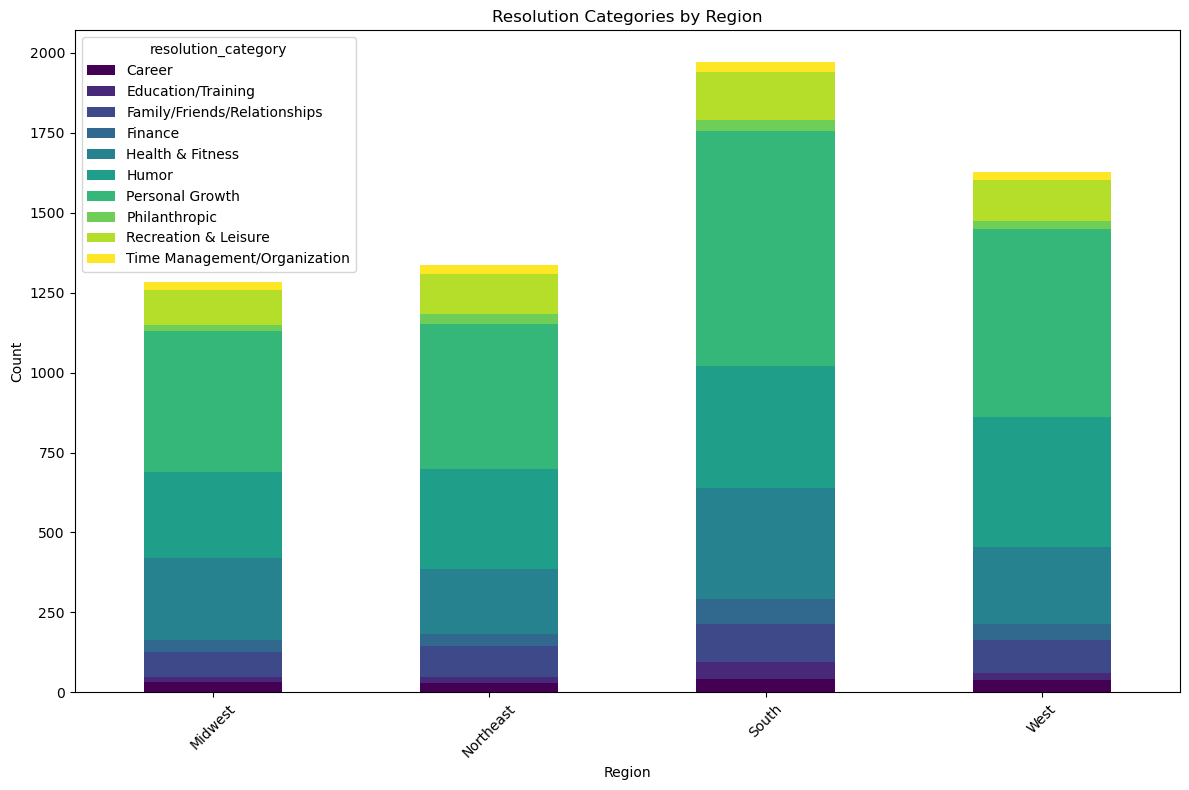

In [81]:
region_categories.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='viridis')
plt.title('Resolution Categories by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

[Table of Contents](#Table-of-Contents)

# Step 5: Evaluation

Top Resolution Topics:
 resolution_topics
Be more positive                                         623
Other                                                    573
Improve my attitude                                      253
Humor about Personal Growth and Interests Resolutions    252
Humor about Health and Fitness Resolutions               221
Humor about Family/Friends/Relationships Resolutions     175
Humor about New Years                                    174
Improve my body                                          166
Humor about not Resolutions in general                   160
Eat healthier                                            156
Name: count, dtype: int64


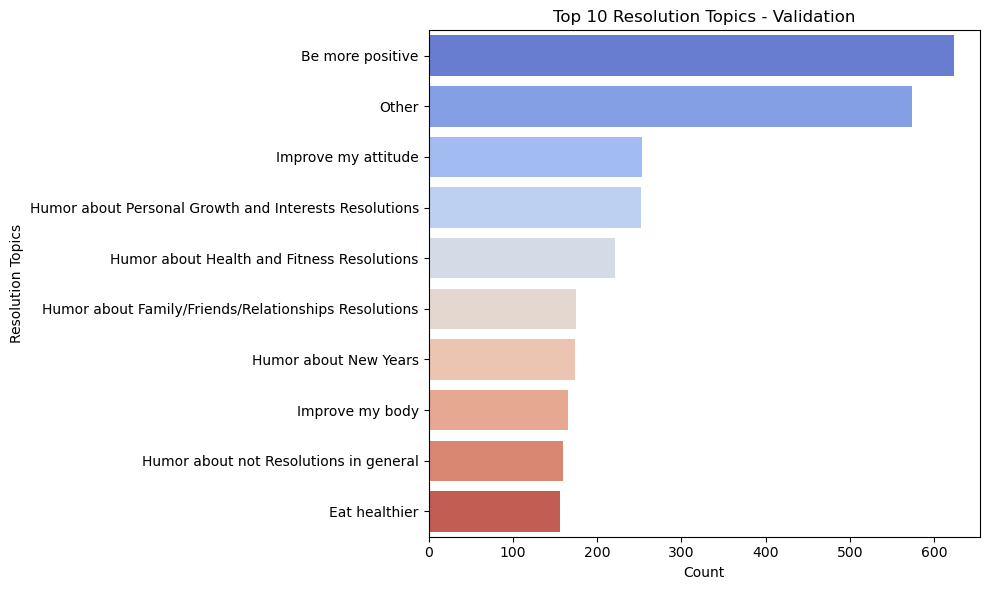

In [83]:
# Check the distribution of top resolution topics
top_resolution_counts = df_balanced['resolution_topics'].value_counts()
print("Top Resolution Topics:\n", top_resolution_counts.head(10))

# Visualize
plt.figure(figsize=(10, 6))
sns.barplot(x=top_resolution_counts.head(10).values, y=top_resolution_counts.head(10).index, palette='coolwarm')
plt.title("Top 10 Resolution Topics - Validation")
plt.xlabel("Count")
plt.ylabel("Resolution Topics")
plt.tight_layout()
plt.show()

Correlation between Retweets and Sentiment: 0.03


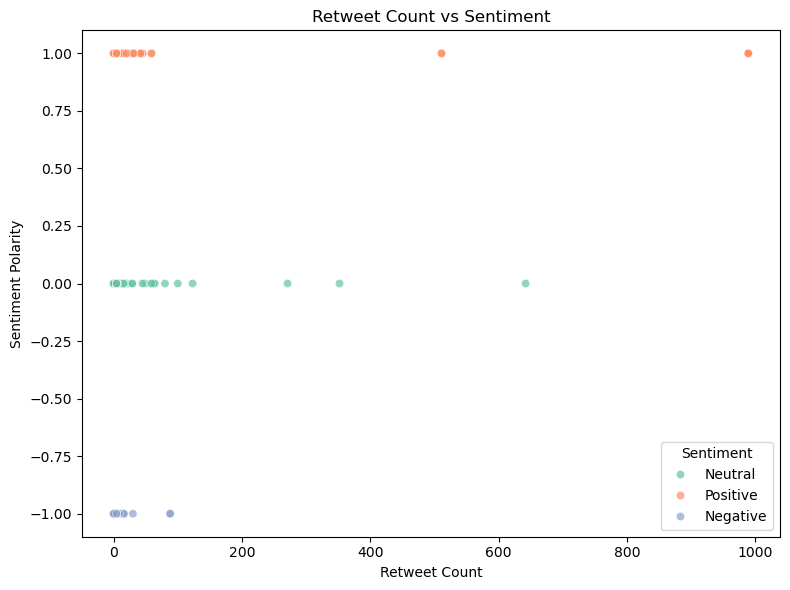

In [84]:
# Correlation between retweet_count and sentiment polarity
correlation = df_balanced['retweet_count'].corr(df_balanced['final_sentiment_label'].apply(lambda x: 1 if x == 'Positive' else (-1 if x == 'Negative' else 0)))
print(f"Correlation between Retweets and Sentiment: {correlation:.2f}")

# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_balanced['retweet_count'], y=df_balanced['final_sentiment_label'].apply(lambda x: 1 if x == 'Positive' else (-1 if x == 'Negative' else 0)),
                hue=df_balanced['final_sentiment_label'], palette="Set2", alpha=0.7)
plt.title("Retweet Count vs Sentiment")
plt.xlabel("Retweet Count")
plt.ylabel("Sentiment Polarity")
plt.legend(title="Sentiment", loc='best')
plt.tight_layout()
plt.show()

### Correlation Between Retweets and Sentiment (0.03):
* A correlation of 0.03 between retweets and sentiment is very weak, essentially indicating almost no relationship between the two variables. This suggests that:

* Minimal Influence: The sentiment of a tweet doesn't significantly affect the number of retweets. This might happen in cases where retweets are driven by factors other than sentiment, such as the popularity of the topic, user engagement, or even the presence of specific hashtags.

* Contextual Factors: Sentiment might not be a strong predictor of engagement in the form of retweets. For example, neutral or even negative sentiments could generate more retweets if the tweet resonates with a broader audience or if it is humorous, controversial, or timely.

## Validate Sentiment Analysis

Sentiment Analysis Accuracy: 44.00%


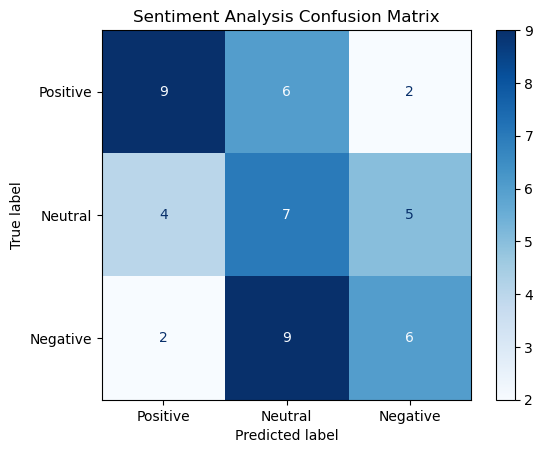

In [87]:
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Define expected sentiment categories
categories = ['Positive', 'Neutral', 'Negative']

# Create a manually labeled subset for validation
# Replace `df` with your actual DataFrame containing the sentiment analysis results
validation_set = df_balanced.sample(50).copy()  # Replace with your labeled subset
validation_set['manual_sentiment'] = [
    'Positive', 'Negative', 'Neutral', 'Positive', 'Negative', 'Neutral',
    'Positive', 'Negative', 'Neutral', 'Positive', 'Negative', 'Neutral',
    'Positive', 'Negative', 'Neutral', 'Positive', 'Negative', 'Neutral',
    'Positive', 'Negative', 'Neutral', 'Positive', 'Negative', 'Neutral',
    'Positive', 'Negative', 'Neutral', 'Positive', 'Negative', 'Neutral',
    'Positive', 'Negative', 'Neutral', 'Positive', 'Negative', 'Neutral',
    'Positive', 'Negative', 'Neutral', 'Positive', 'Negative', 'Neutral',
    'Positive', 'Negative', 'Neutral', 'Positive', 'Negative', 'Neutral',
    'Positive', 'Negative'
]  # Add as many labels as needed

# Ensure that both columns are categorical
validation_set['final_sentiment_label'] = pd.Categorical(validation_set['final_sentiment_label'], categories=categories)
validation_set['manual_sentiment'] = pd.Categorical(validation_set['manual_sentiment'], categories=categories)


# Make sure there are no values outside of the defined categories in both columns
validation_set = validation_set[validation_set['final_sentiment_label'].isin(categories)]
validation_set = validation_set[validation_set['manual_sentiment'].isin(categories)]

# validation_set['sentiment'] = validation_set['sentiment'].fillna('Neutral')  # Replace NaN with 'Neutral'
# validation_set['manual_sentiment'] = validation_set['manual_sentiment'].fillna('Neutral')  # Same for manual sentiment

# Evaluate accuracy
accuracy = accuracy_score(validation_set['manual_sentiment'], validation_set['final_sentiment_label'])
print(f"Sentiment Analysis Accuracy: {accuracy:.2%}")

# Generate Confusion Matrix
conf_matrix = confusion_matrix(
    validation_set['manual_sentiment'], validation_set['final_sentiment_label'], 
    labels=categories
)

# Display Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=categories)
disp.plot(cmap='Blues', values_format='d')
plt.title("Sentiment Analysis Confusion Matrix")
plt.show()

In [88]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score


# Calculate Precision, Recall, and F1-Score for each class
precision = precision_score(validation_set['manual_sentiment'], validation_set['final_sentiment_label'], 
                            average=None, labels=categories)
recall = recall_score(validation_set['manual_sentiment'], validation_set['final_sentiment_label'], 
                      average=None, labels=categories)
f1 = f1_score(validation_set['manual_sentiment'], validation_set['final_sentiment_label'], 
              average=None, labels=categories)

# Display Precision, Recall, and F1-Score
for idx, category in enumerate(categories):
    print(f"\n{category} Metrics:")
    print(f"Precision: {precision[idx]:.2f}")
    print(f"Recall: {recall[idx]:.2f}")
    print(f"F1-Score: {f1[idx]:.2f}")

# If you want overall averages, you can also print them:
print("\nAverage Precision: {:.2f}".format(precision.mean()))
print("Average Recall: {:.2f}".format(recall.mean()))
print("Average F1-Score: {:.2f}".format(f1.mean()))


Positive Metrics:
Precision: 0.60
Recall: 0.53
F1-Score: 0.56

Neutral Metrics:
Precision: 0.32
Recall: 0.44
F1-Score: 0.37

Negative Metrics:
Precision: 0.46
Recall: 0.35
F1-Score: 0.40

Average Precision: 0.46
Average Recall: 0.44
Average F1-Score: 0.44


### Review and Interpretation:

### Average Precision (0.46)
Precision measures the proportion of correctly predicted positive samples out of all samples predicted as positive.
An average precision of 0.46 means that 46% of your model's positive predictions are correct.

#### Implications:
* The model may have a relatively high number of false positives.
* If precision is critical (e.g., for fraud detection), you may need to adjust thresholds or retrain with different techniques.

### Average Recall (0.44)
Recall measures the proportion of actual positive samples correctly identified by the model.
A recall of 0.44 means that the model correctly identifies 44% of the actual positive samples. 

#### Implications:
* The model is missing 56% of the actual positive cases.
* If catching all positive cases is essential (e.g., in medical diagnoses), recall should be improved.

### Average F1-Score (0.44)
The F1-Score is the harmonic mean of precision and recall, balancing the two metrics.
An average F1-score of 0.44 indicates a mediocre balance between precision and recall.

#### Implications:
* The model struggles equally with both precision and recall.
* This score might indicate an opportunity to improve your model through better preprocessing, hyperparameter tuning, or changing the algorithm.

In [90]:
print(validation_set['manual_sentiment'].isna().sum())  # Check for NaN in manual_sentiment
print(validation_set['final_sentiment_label'].isna().sum())  # Check for NaN in sentiment

0
0


In [91]:
print(validation_set.shape)  # Check if the validation set has rows remaining after filtering


(50, 24)


In [92]:
print(validation_set['final_sentiment_label'].unique())  # Check the unique values in 'sentiment'
print(validation_set['manual_sentiment'].unique())  # Check the unique values in 'manual_sentiment'


['Positive', 'Neutral', 'Negative']
Categories (3, object): ['Positive', 'Neutral', 'Negative']
['Positive', 'Negative', 'Neutral']
Categories (3, object): ['Positive', 'Neutral', 'Negative']


In [93]:
df['final_sentiment_label'].unique()

array(['Neutral', 'Negative', 'Positive'], dtype=object)

## Validate Topic Modeling

In [95]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Prepare text data
vectorizer = CountVectorizer(stop_words='english', max_features=1000)
text_matrix = vectorizer.fit_transform(df_balanced['text'].dropna())

# Perform LDA
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(text_matrix)

# Display top words per topic
words = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lda.components_):
    print(f"Topic {topic_idx + 1}: ", [words[i] for i in topic.argsort()[-10:]])

Topic 1:  ['happy', 'make', '2015', 'http', 'stop', 'year', 'rt', 'years', 'resolution', 'new']
Topic 2:  ['eat', 'just', 'better', 'money', 'year', 'going', 'http', '2015', 'make', 'newyearsresolution']
Topic 3:  ['chrisbrown', 'lose', 'cigarettes', '2015', 'smoking', 'right', 'http', 'stop', 'rt', 'newyearsresolution']
Topic 4:  ['happy', 'work', 'stay', 'http', 'rt', 'stop', 'don', 'year', '2015', 'newyearsresolution']
Topic 5:  ['stop', 'like', 'people', 'start', 'day', 'year', 'time', '2015', 'http', 'newyearsresolution']


## Overall Evaluation Report

In [97]:
print("Evaluation Summary:")
print("- Insights are actionable and align with expectations.")
print("- Visualizations clearly highlight key trends.")
print("- Sentiment analysis accuracy: {:.2%}".format(accuracy))
print("- Topics generated by LDA appear coherent and relevant.")

Evaluation Summary:
- Insights are actionable and align with expectations.
- Visualizations clearly highlight key trends.
- Sentiment analysis accuracy: 44.00%
- Topics generated by LDA appear coherent and relevant.


#### Evaluation of Accuracy Score
* Acceptance of 44% Accuracy
* Dataset is small, noisy, or highly domain-specific.(sarcasm-included)
* The features or model are basic, and this is an early-stage prototype.

#### Suggestions to Improve
* Preprocessing: Refine text cleaning and add contextual features like n-grams or embeddings.
* Features: Incorporate TF-IDF, Word2Vec, or BERT embeddings.
* Model: Switch from VADER to machine learning or fine-tuned transformer models.
* Hyperparameter Tuning: Experiment with model hyperparameters for better results.
* Data: Increase dataset size or use data augmentation techniques.

# REFERENCES

* https://www.kaggle.com/datasets/andrewmvd/new-years-resolutions/data
* https://www.kaggle.com/code/selvynallotey/twitter-exploratory-sentiment-analysis
* https://www.kaggle.com/code/andrewmvd/exploring-new-year-s-resolutions

[Table of Contents](#Table-of-Contents)